In [1]:
%load_ext autoreload
%autoreload 2


In [2]:

from google.colab import drive
drive.mount('/content/gdrive')




Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/My Drive/Tolman-Eichenbaum-Machine



/content/gdrive/My Drive/Tolman-Eichenbaum-Machine


In [4]:

! ls



 clustering_final.ipynb
 Clustering.ipynb
'Copy of TEM_notebook_social_hierarchy (1).ipynb'
'Copy of TEM_notebook_social_hierarchy.ipynb'
'Copy of TEM_notebook_square.ipynb'
 g0_auto.pdf
 generalising-structural-knowledge
 Main_TEM_notebook_social_hierarchy.ipynb
 plot_TEM_results
 Summaries
 TEM_notebook_familytree.ipynb
 TEM_notebook_HEX.ipynb
 TEM_notebook_line_ti.ipynb
 TEM_notebook_loop_laps.ipynb
 TEM_notebook_social_hierarchy.ipynb
 TEM_run.ipynb
 torch_tem


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import datetime
import re
from os import listdir
import sys
#sys.path.insert(0, 'model_files/')
sys.path.insert(0, 'generalising-structural-knowledge/')
from plotting_functions import *
from arb_functions import *
from helper_functions import *
from behaviour_analyses import *
from environment_functions import *

save_dirs = ['Summaries/']

date = '2021-01-01'
run = '0_social_hierarchy_initial_world_n_action=10' 

recent = -1
data, para, list_of_files, save_path = get_data(save_dirs, run, date, recent)

A_RNN, g2g, x_all, g_all, p_all, p_gen_all, acc_s_t_to, acc_s_t_from, positions, shinys, adj, timeseries = data
params, widths, batch_id, g_size, p_size, s_size, s_size_comp, n_freq, width, states = para

mult = 4 if params['world_type'] == 'tonegawa' else 4  # upsample
smoothing = 1
cmap = 'jet'
maxmin=True

import seaborn
seaborn.set_style(style='white')
seaborn.set_style({'axes.spines.bottom': False,'axes.spines.left': False,'axes.spines.right': \
                   False,'axes.spines.top': False})

shinys_, masks, g_lim, p_lim = sort_data(g_all=g_all, p_all=p_all, shinys=shinys, widths=widths, mult=1, smoothing=0, params=params, batch_id=batch_id, \
                                         g_max_0=False, p_max_0=True)

yesSummaries/2021-01-01/run0_social_hierarchy_initial_world_n_action=10/save
21555 11
538875
no p_timeseries


In [30]:

env0 = 1
env1 = 2

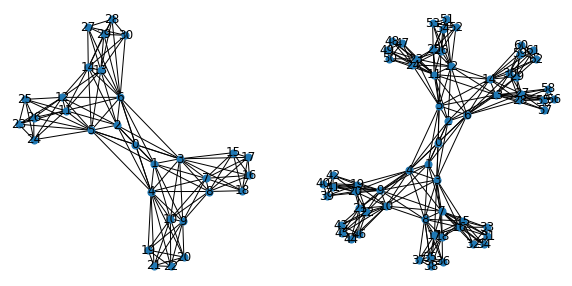

In [31]:

import networkx as nx
try:
    plt.figure(figsize=(10,5))
    for i, env in enumerate([env0, env1]):
        adj_ = remove_zero_adj(adj[env])
        plt.subplot(1,2,i + 1)
        g = nx.from_numpy_matrix(adj_)
        pos_nodes = nx.spring_layout(g, iterations=500)
        nx.draw(g, pos=pos_nodes, node_size=50, with_labels=True)
    
    plt.show()
except TypeError:
    plt.close('all')
    pass

In [32]:
for env in range(params['n_envs_save']):
    num_correct = np.sum(acc_s_t_to[env] * positions[env])
    proportion = num_correct / sum(positions[env])
    approx_num = proportion * np.sum(positions[env] > 0.1)
    print(env, '   Approx proportion : ', np.round(proportion, decimals=3), \
          '   Approx num : ', np.round(approx_num, decimals=2))

0    Approx proportion :  0.961    Approx num :  29.78
1    Approx proportion :  0.958    Approx num :  29.7
2    Approx proportion :  0.883    Approx num :  55.6
3    Approx proportion :  0.888    Approx num :  55.92
4    Approx proportion :  0.988    Approx num :  14.82
5    Approx proportion :  0.989    Approx num :  14.83


In [33]:
params['widths']

[4, 4, 5, 5, 3, 3, 4, 4, 3, 5, 5, 4, 3, 4, 3, 5]

In [34]:
import matplotlib.pyplot as plt
import networkx as nx

import networkx as nx
import random

    
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.  
    Licensed under Creative Commons Attribution-Share Alike 
    
    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.
    
    G: the graph (must be a tree)
    
    root: the root node of current branch 
    - if the tree is directed and this is not given, 
      the root will be found and used
    - if the tree is directed and this is given, then 
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given, 
      then a random choice will be used.
    
    width: horizontal space allocated for this branch - avoids overlap with other branches
    
    vert_gap: gap between levels of hierarchy
    
    vert_loc: vertical location of root
    
    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)





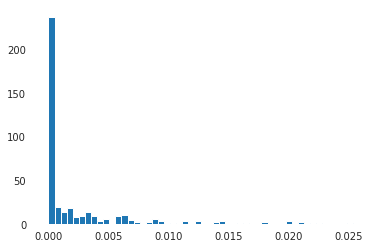

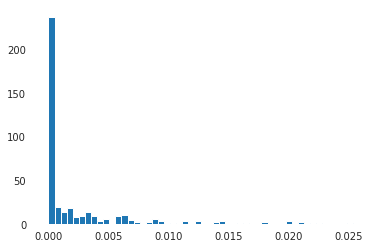

In [35]:
#g_all[env0].mean(0)
#p_all[env0].mean(0).shape
plt.hist(p_all[env0].mean(0),50, density=False)
plt.show()
plt.hist(p_all[env0].mean(0),50
         )
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor 

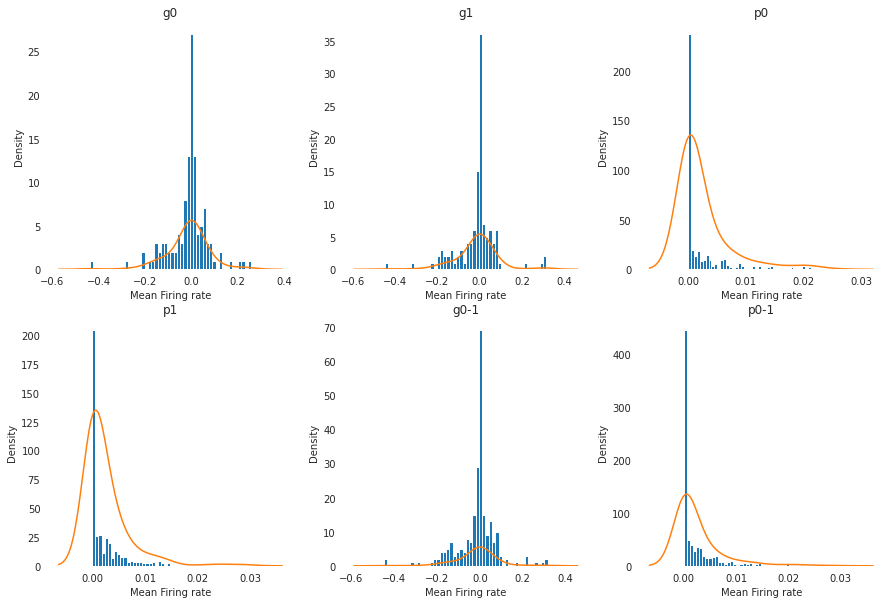

In [37]:
import seaborn as sns

plt.rcParams["figure.figsize"] = (15,10)
fig, axs = plt.subplots(2,3)

axs[0,0].hist(g_all[env0].mean(0),50, density=False)
sns.kdeplot(g_all[env0].mean(0), bw=0.5,ax=axs[0,0])
axs[0,0].set_title("g0")
axs[0,0].set_xlabel("Mean Firing rate")


axs[0,1].hist(g_all[env1].mean(0),50, density=False)
sns.kdeplot(g_all[env1].mean(0), bw=0.5,ax=axs[0,1])
axs[0,1].set_title("g1")
axs[0,1].set_xlabel("Mean Firing rate")

axs[0,2].hist(p_all[env0].mean(0),50, density=False)
sns.kdeplot(p_all[env0].mean(0), bw=0.5,ax=axs[0,2])
axs[0,2].set_title("p0")
axs[0,2].set_xlabel("Mean Firing rate")

axs[1,0].hist(p_all[env1].mean(0),50, density=False)
sns.kdeplot(p_all[env1].mean(0), bw=0.5,ax=axs[1,0])
axs[1,0].set_title("p1")
axs[1,0].set_xlabel("Mean Firing rate")

axs[1,1].hist(np.append(g_all[env0].mean(0),g_all[env1].mean(0)),50, density=False)
sns.kdeplot(np.append(g_all[env0].mean(0),g_all[env1].mean(0)), bw=0.5,ax=axs[1,1])
axs[1,1].set_title("g0-1")
axs[1,1].set_xlabel("Mean Firing rate")

axs[1,2].hist(np.append(p_all[env0].mean(0),p_all[env1].mean(0)),50, density=False)
sns.kdeplot(np.append(p_all[env0].mean(0),p_all[env1].mean(0)), bw=0.5,ax=axs[1,2])
axs[1,2].set_title("p0-1")
axs[1,2].set_xlabel("Mean Firing rate")
plt.show()

fig.savefig("mean_firing_rate_density_initial_world_n_action=10.pdf")
plt.close("all")

In [ ]:
np.append(g_all[env0].mean(0),g_all[env1].mean(0),axis=0).shape

(240,)

In [ ]:
from sklearn import preprocessing
g_0_mean_normalise = (g_all[env0].mean(0)-g_all[env0].mean(0).min())/(g_all[env0].mean(0).max()-g_all[env0].mean(0).min())
g_0_std_normalise = (g_all[env0].std(0)-g_all[env0].std(0).min())/(g_all[env0].std(0).max()-g_all[env0].std(0).min())

g_1_mean_normalise = (g_all[env1].mean(0)-g_all[env1].mean(0).min())/(g_all[env1].mean(0).max()-g_all[env1].mean(0).min())
g_1_std_normalise = (g_all[env1].std(0)-g_all[env1].std(0).min())/(g_all[env1].std(0).max()-g_all[env1].std(0).min())

p_0_mean_normalise = (p_all[env0].mean(0)-p_all[env0].mean(0).min())/(p_all[env0].mean(0).max()-p_all[env0].mean(0).min())
p_0_std_normalise = (p_all[env0].std(0)-p_all[env0].std(0).min())/(p_all[env0].std(0).max()-p_all[env0].std(0).min())

p_1_mean_normalise = (p_all[env1].mean(0)-p_all[env1].mean(0).min())/(p_all[env1].mean(0).max()-p_all[env1].mean(0).min())
p_1_std_normalise = (p_all[env1].std(0)-p_all[env1].std(0).min())/(p_all[env1].std(0).max()-p_all[env1].std(0).min())


g_0_mean = g_all[env0].mean(0)
g_0_std = g_all[env0].std(0)
g_1_mean = g_all[env1].mean(0)
g_1_std = g_all[env1].std(0)
p_0_mean = p_all[env0].mean(0)
p_0_std = p_all[env0].std(0)
p_1_mean = p_all[env1].mean(0)
p_1_std = p_all[env1].std(0)


g_0_1_mean = np.append(g_all[env0].mean(0),g_all[env1].mean(0),axis=0)
p_0_1_mean = np.append(p_all[env0].mean(0),p_all[env1].mean(0),axis=0)

g_0_1_std = np.append(g_all[env0].std(0),g_all[env1].std(0),axis=0)
p_0_1_std = np.append(p_all[env0].std(0),p_all[env1].std(0),axis=0)


g_0_1_mean_normalise = (g_0_1_mean-g_0_1_mean.min())/(g_0_1_mean.max()-g_0_1_mean.min())
g_0_1_std_normalise = (g_0_1_std-g_0_1_std.min())/(g_0_1_std.max()-g_0_1_std.min())

p_0_1_mean_normalise = (p_0_1_mean-p_0_1_mean.min())/(p_0_1_mean.max()-p_0_1_mean.min())
p_0_1_std_normalise = (p_0_1_std-p_0_1_std.min())/(p_0_1_std.max()-p_0_1_std.min())



plt.rcParams["figure.figsize"] = (25,5)
fig, axs = plt.subplots(1,5)

axs[0].plot(g_0_mean,g_0_std,marker='o',linestyle="None",color="red",label="g0")
axs[0].plot(p_0_mean,p_0_std,marker='+',linestyle="None",color="blue",label="p0")
axs[0].legend()
axs[0].set_xlabel("Mean Firing Rate")
axs[0].set_ylabel("Std Firing Rate")



axs[1].plot(g_1_mean,g_1_std,marker='o',linestyle="None",color="red",label="g1")
axs[1].plot(p_1_mean,p_1_std,marker='+',linestyle="None",color="blue",label="p1")
axs[1].legend()
axs[1].set_xlabel("Mean Firing Rate")


axs[2].plot(g_0_mean,g_0_std,marker='o',linestyle="None",color="red",label="g0")
axs[2].plot(g_1_mean,g_1_std,marker='+',linestyle="None",color="blue",label="g1")
axs[2].legend()
axs[2].set_xlabel("Mean Firing Rate")

axs[3].plot(p_0_mean,p_0_std,marker='o',linestyle="None",color="red",label="p0")
axs[3].plot(p_1_mean,p_1_std,marker='+',linestyle="None",color="blue",label="p1")
axs[3].legend()
axs[3].set_xlabel("Mean Firing Rate")

axs[4].plot(g_0_1_mean,g_0_1_std,marker='o',linestyle="None",color="red",label="g0-1")
axs[4].plot(p_0_1_mean,p_0_1_std,marker='+',linestyle="None",color="blue",label="p0-1")
axs[4].legend()
axs[4].set_xlabel("Mean Firing Rate")
plt.show()


fig.savefig("std_mean_firing_rate_large_world_n_action=3.pdf")
plt.close("all")

In [ ]:
X1 = np.concatenate((g_all[env0].mean(0),g_all[env1].mean(0),p_all[env0].mean(0),p_all[env1].mean(0)),axis=0)
X1.min()
X1 = X1-X1.min()/(X1.max()-X1.min())
X1.max()

0.901401763769094

In [ ]:
# X1 = np.concatenate((g_all[env0].mean(0),g_all[env1].mean(0),p_all[env0].mean(0),p_all[env1].mean(0)),axis=0)
# X2 = np.concatenate((g_all[env0].std(0),g_all[env1].std(0),p_all[env0].std(0),p_all[env1].std(0)),axis=0)

# X1 = (X1-X1.min())/(X1.max()-X1.min())
# X2 = (X2-X2.min())/(X2.max()-X2.min())
import pandas as pd
from sklearn.preprocessing import StandardScaler

X1 = np.concatenate((g_0_1_mean_normalise,p_0_1_mean_normalise),axis=0)
X2 = np.concatenate((g_0_1_std_normalise,p_0_1_std_normalise),axis=0)
df = pd.DataFrame({'X1': X1, 'X2': X2})
scaler = StandardScaler()
#X_std = scaler.fit_transform(df)
X_std = df.to_numpy()
g_0_1_mean_normalise.shape

(240,)

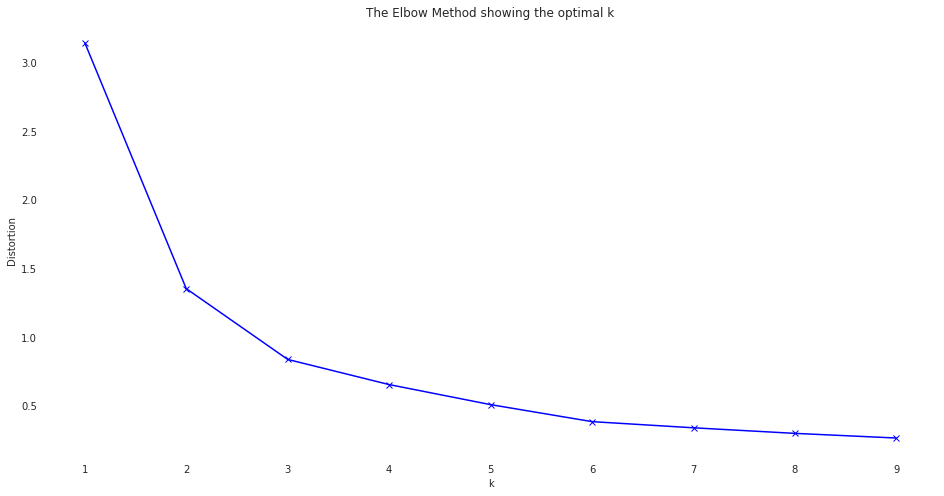

In [ ]:
#np.concatenate(g_all[0].mean(0),g_all[1].mean(0),axis=0).shape
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
import pandas as pd

X1 = np.concatenate((g_0_1_mean_normalise,p_0_1_mean_normalise),axis=0)
X2 = np.concatenate((g_0_1_std_normalise,p_0_1_std_normalise),axis=0)

X1 = np.concatenate((g_0_1_mean,p_0_1_mean),axis=0)
X2 = np.concatenate((g_0_1_std,p_0_1_std),axis=0)

# X1 = (X1-X1.min())/(X1.max()-X1.min())
# X2 = (X2-X2.min())/(X2.max()-X2.min())
df = pd.DataFrame({'X1': X1, 'X2': X2})
scaler = StandardScaler()
# X_std = scaler.fit_transform(df)

X_std = df.to_numpy()
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=9)
    kmeanModel.fit(X_std)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

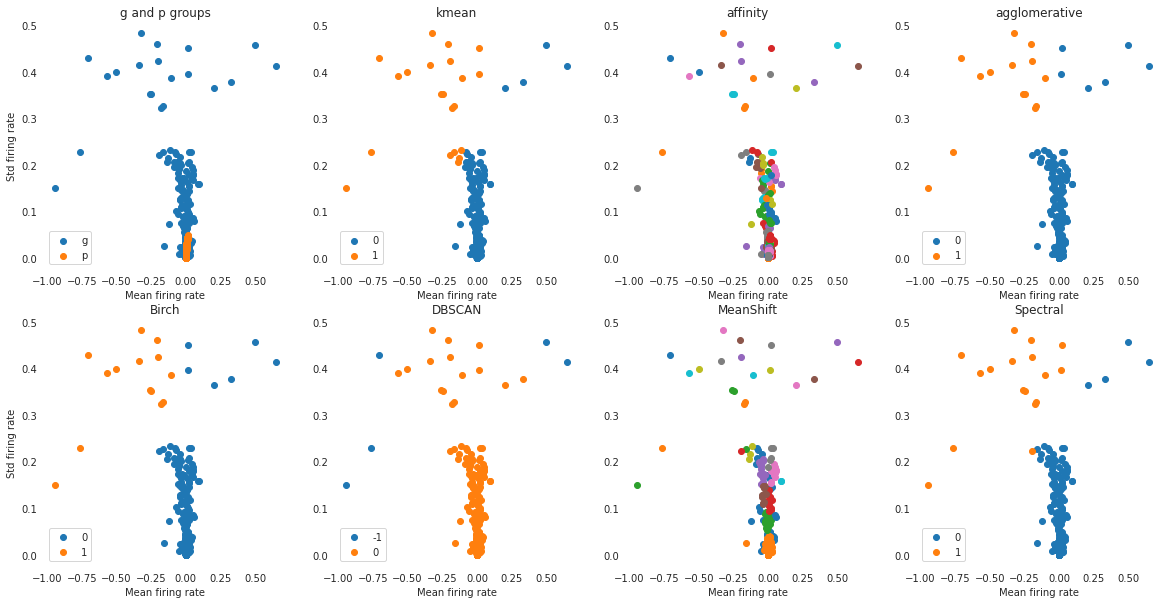

In [ ]:
X1 = np.concatenate((g_0_1_mean,p_0_1_mean),axis=0)
X2 = np.concatenate((g_0_1_std,p_0_1_std),axis=0)

# X1 = (X1-X1.min())/(X1.max()-X1.min())
# X2 = (X2-X2.min())/(X2.max()-X2.min())
df = pd.DataFrame({'X1': X1, 'X2': X2})
scaler = StandardScaler()
# X_std = scaler.fit_transform(df)

X_std = df.to_numpy()

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
fig, axs = plt.subplots(2,4)

axs[0,0].scatter(X_std[range(240) , 0] , X_std[range(240) , 1] , label ="g")
axs[0,0].scatter(X_std[range(240,1040) , 0] , X_std[range(240,1040) , 1] , label = "p")
axs[0,0].legend()
axs[0,0].set_title("g and p groups")
axs[0,0].set_ylabel("Std firing rate")
axs[0,0].set_xlabel("Mean firing rate")





kmeanModel = KMeans(n_clusters=2,random_state=17)
kmeanlabel = kmeanModel.fit_predict(X_std)
u_labels = np.unique(kmeanlabel)
for i in u_labels:
    axs[0,1].scatter(X_std[kmeanlabel == i , 0] , X_std[kmeanlabel == i , 1] , label = i)
axs[0,1].legend()
axs[0,1].set_title("kmean")
axs[0,1].set_xlabel("Mean firing rate")



affinityModel = AffinityPropagation(damping=0.9)
affinitylabel = affinityModel.fit_predict(X_std)
u_labels = np.unique(affinitylabel)
for i in u_labels:
    axs[0,2].scatter(X_std[affinitylabel == i , 0] , X_std[affinitylabel == i , 1] , label = i)
# plt.legend()
axs[0,2].set_title("affinity")
axs[0,2].set_xlabel("Mean firing rate")

agglomerativeModel = AgglomerativeClustering(n_clusters=2)
agglomerativelabel = agglomerativeModel.fit_predict(X_std)
u_labels = np.unique(agglomerativelabel)
for i in u_labels:
    axs[0,3].scatter(X_std[agglomerativelabel == i , 0] , X_std[agglomerativelabel == i , 1] , label = i)
axs[0,3].legend()
axs[0,3].set_title("agglomerative")
axs[0,3].set_xlabel("Mean firing rate")

BirchModel = Birch(threshold=0.01, n_clusters=2)
Birchlabel = BirchModel.fit_predict(X_std)
u_labels = np.unique(Birchlabel)
for i in u_labels:
    axs[1,0].scatter(X_std[Birchlabel == i , 0] , X_std[Birchlabel == i , 1] , label = i)
axs[1,0].legend()
axs[1,0].set_title("Birch")
axs[1,0].set_ylabel("Std firing rate")
axs[1,0].set_xlabel("Mean firing rate")

DBSCANModel = DBSCAN(eps=0.30, min_samples=9)
DBSCANlabel = DBSCANModel.fit_predict(X_std)
u_labels = np.unique(DBSCANlabel)
for i in u_labels:
    axs[1,1].scatter(X_std[DBSCANlabel == i , 0] , X_std[DBSCANlabel == i , 1] , label = i)
axs[1,1].legend()
axs[1,1].set_title("DBSCAN")
axs[1,1].set_xlabel("Mean firing rate")

MeanShiftModel = MeanShift(cluster_all=False)
MeanShiftlabel = MeanShiftModel.fit_predict(X_std)
u_labels = np.unique(MeanShiftlabel)
for i in u_labels:
    axs[1,2].scatter(X_std[MeanShiftlabel == i , 0] , X_std[MeanShiftlabel == i , 1] , label = i)
#axs[1,2].legend()
axs[1,2].set_title("MeanShift")
axs[1,2].set_xlabel("Mean firing rate")

SpectralModel = SpectralClustering(n_clusters=2)
Spectrallabel = SpectralModel.fit_predict(X_std)
u_labels = np.unique(Spectrallabel)
for i in u_labels:
    axs[1,3].scatter(X_std[Spectrallabel == i , 0] , X_std[Spectrallabel == i , 1] , label = i)
axs[1,3].legend()
axs[1,3].set_title("Spectral")
axs[1,3].set_xlabel("Mean firing rate")
plt.show()


fig.savefig("std_mean_firing_rate_CLUSTERING_large_world_n_action=3.pdf")
plt.close("all")

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_affinity_propagation.py:226: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)


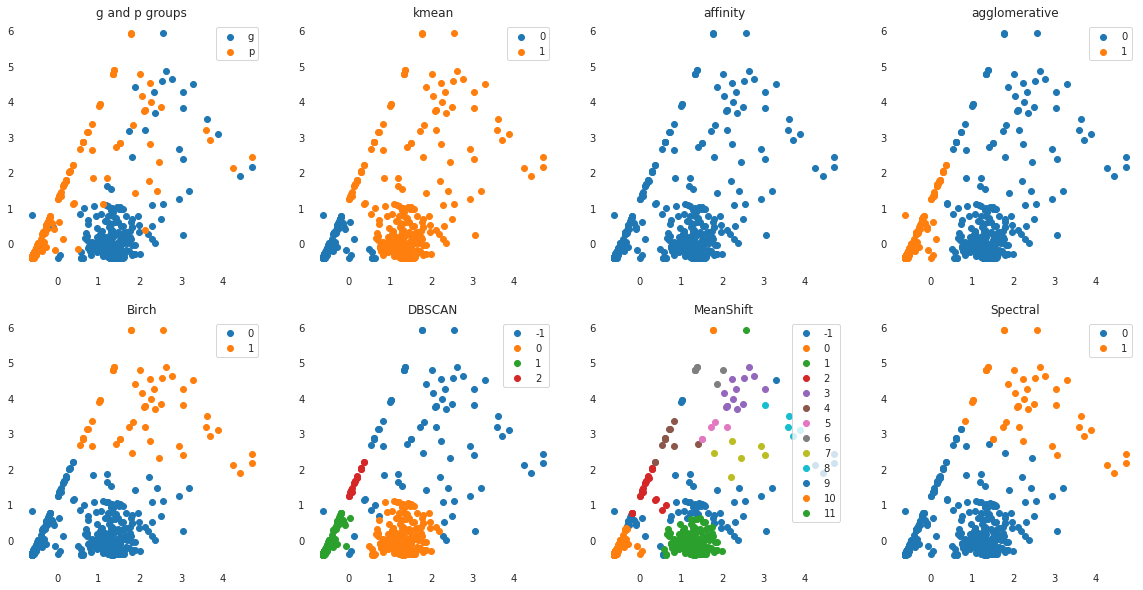

In [ ]:
X1 = np.concatenate((g_0_1_mean_normalise,p_0_1_mean_normalise),axis=0)
X2 = np.concatenate((g_0_1_std_normalise,p_0_1_std_normalise),axis=0)




df = pd.DataFrame({'X1': X1, 'X2': X2})
scaler = StandardScaler()
X_std = scaler.fit_transform(df)


import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
fig, axs = plt.subplots(2,4)

axs[0,0].scatter(X_std[range(240) , 0] , X_std[range(240) , 1] , label ="g")
axs[0,0].scatter(X_std[range(240,1040) , 0] , X_std[range(240,1040) , 1] , label = "p")
axs[0,0].legend()
axs[0,0].set_title("g and p groups")





kmeanModel = KMeans(n_clusters=2,random_state=17)
kmeanlabel = kmeanModel.fit_predict(X_std)
u_labels = np.unique(kmeanlabel)
for i in u_labels:
    axs[0,1].scatter(X_std[kmeanlabel == i , 0] , X_std[kmeanlabel == i , 1] , label = i)
axs[0,1].legend()
axs[0,1].set_title("kmean")




affinityModel = AffinityPropagation(damping=0.9)
affinitylabel = affinityModel.fit_predict(X_std)
u_labels = np.unique(affinitylabel)
for i in u_labels:
    axs[0,2].scatter(X_std[affinitylabel == i , 0] , X_std[affinitylabel == i , 1] , label = i)
# plt.legend()
axs[0,2].set_title("affinity")


agglomerativeModel = AgglomerativeClustering(n_clusters=2)
agglomerativelabel = agglomerativeModel.fit_predict(X_std)
u_labels = np.unique(agglomerativelabel)
for i in u_labels:
    axs[0,3].scatter(X_std[agglomerativelabel == i , 0] , X_std[agglomerativelabel == i , 1] , label = i)
axs[0,3].legend()
axs[0,3].set_title("agglomerative")


BirchModel = Birch(threshold=0.01, n_clusters=2)
Birchlabel = BirchModel.fit_predict(X_std)
u_labels = np.unique(Birchlabel)
for i in u_labels:
    axs[1,0].scatter(X_std[Birchlabel == i , 0] , X_std[Birchlabel == i , 1] , label = i)
axs[1,0].legend()
axs[1,0].set_title("Birch")


DBSCANModel = DBSCAN(eps=0.30, min_samples=9)
DBSCANlabel = DBSCANModel.fit_predict(X_std)
u_labels = np.unique(DBSCANlabel)
for i in u_labels:
    axs[1,1].scatter(X_std[DBSCANlabel == i , 0] , X_std[DBSCANlabel == i , 1] , label = i)
axs[1,1].legend()
axs[1,1].set_title("DBSCAN")


MeanShiftModel = MeanShift(cluster_all=False)
MeanShiftlabel = MeanShiftModel.fit_predict(X_std)
u_labels = np.unique(MeanShiftlabel)
for i in u_labels:
    axs[1,2].scatter(X_std[MeanShiftlabel == i , 0] , X_std[MeanShiftlabel == i , 1] , label = i)
axs[1,2].legend()
axs[1,2].set_title("MeanShift")


SpectralModel = SpectralClustering(n_clusters=2)
Spectrallabel = SpectralModel.fit_predict(X_std)
u_labels = np.unique(Spectrallabel)
for i in u_labels:
    axs[1,3].scatter(X_std[Spectrallabel == i , 0] , X_std[Spectrallabel == i , 1] , label = i)
axs[1,3].legend()
axs[1,3].set_title("Spectral")
plt.show()



In [ ]:

np.random.rand(3, 10).shape

NameError: ignored

In [ ]:
np.random.seed(123)
x = g_all[env0][0]

p = x/x.sum()



from scipy.special import entr

entr(p).sum()

entr(p).sum()/np.log(2)


-inf

In [ ]:
p.sum()

0.9999999999999996

In [ ]:

from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
# define dataset
#X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

df = np.concatenate((p_all[2].T,p_all[3].T))

scaler = StandardScaler()
X_std = scaler.fit_transform(df)
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=9)
    kmeanModel.fit(X_std)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


ValueError: ignored

In [ ]:
""

f = plt.figure(figsize=(60, 99))
for i in range(g_all[env0].shape[0]):
  ax = plt.subplot(32, 32, i + 1)
  ax.hist(g_all[env0][i,:])
  ax.set_xlim([-1,1])
  ax.set_ylim([0,120])

plt.show()
f.savefig("g0_hist_BY_Position_large_world_n_action=10.pdf")
plt.close("all")

f = plt.figure(figsize=(60, 99))
for i in range(g_all[env1].shape[0]):
  ax = plt.subplot(25, 25, i + 1)
  ax.hist(g_all[env1][i,:])
  ax.set_xlim([-1,1])
  ax.set_ylim([0,120])

plt.show()
f.savefig("g1_hist_BY_Position_large_world_n_action=10.pdf")
plt.close("all")

f = plt.figure(figsize=(60, 99))
for i in range(p_all[env0].shape[0]):
  ax = plt.subplot(32, 32, i + 1)
  ax.hist(p_all[env0][i,:])
  ax.set_xlim(left=0)
  ax.set_ylim([0,400])

plt.show()
f.savefig("p0_hist_BY_Position_large_world_n_action=10.pdf")
plt.close("all")

f = plt.figure(figsize=(60, 99))
for i in range(p_all[env1].shape[0]):
  ax = plt.subplot(25, 25, i + 1)
  ax.hist(p_all[env1][i,:])
  ax.set_xlim(left=0)
  ax.set_ylim([0,400])

plt.show()
f.savefig("p1_hist_BY_Position_large_world_n_action=10.pdf")
plt.close("all")

KeyboardInterrupt: ignored

In [ ]:
# Histogram of values g0,g1 and p0,p1

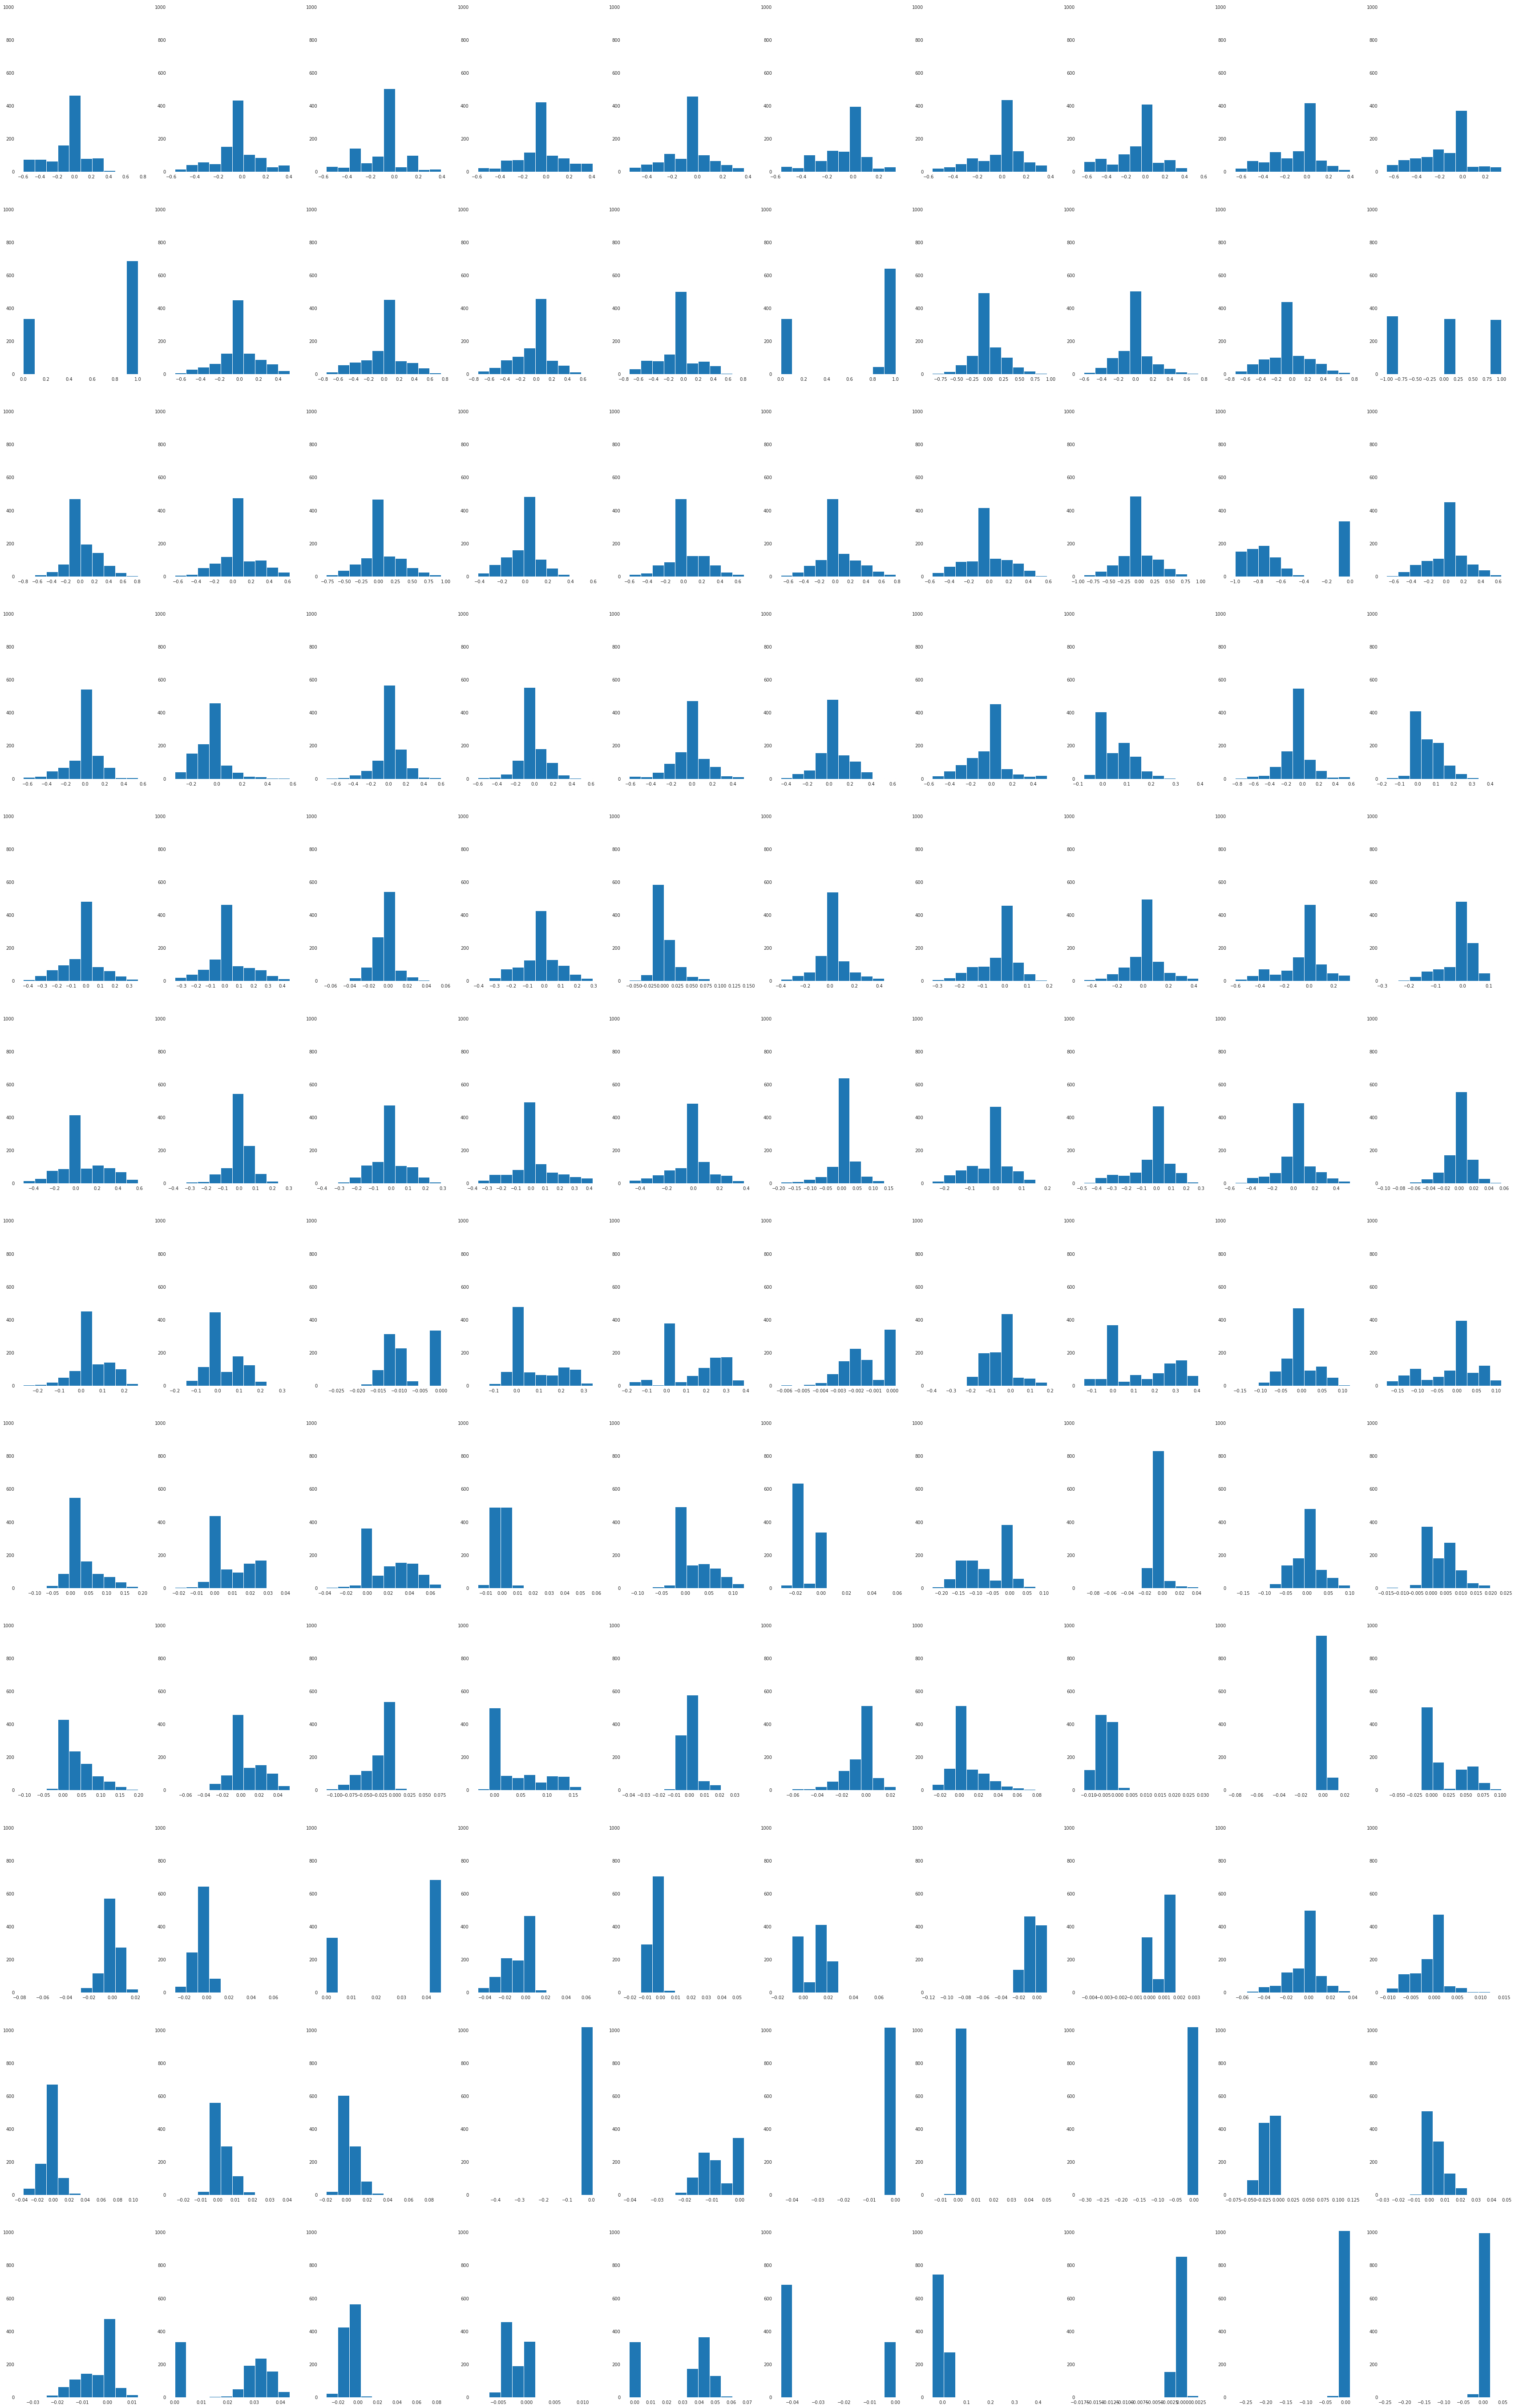

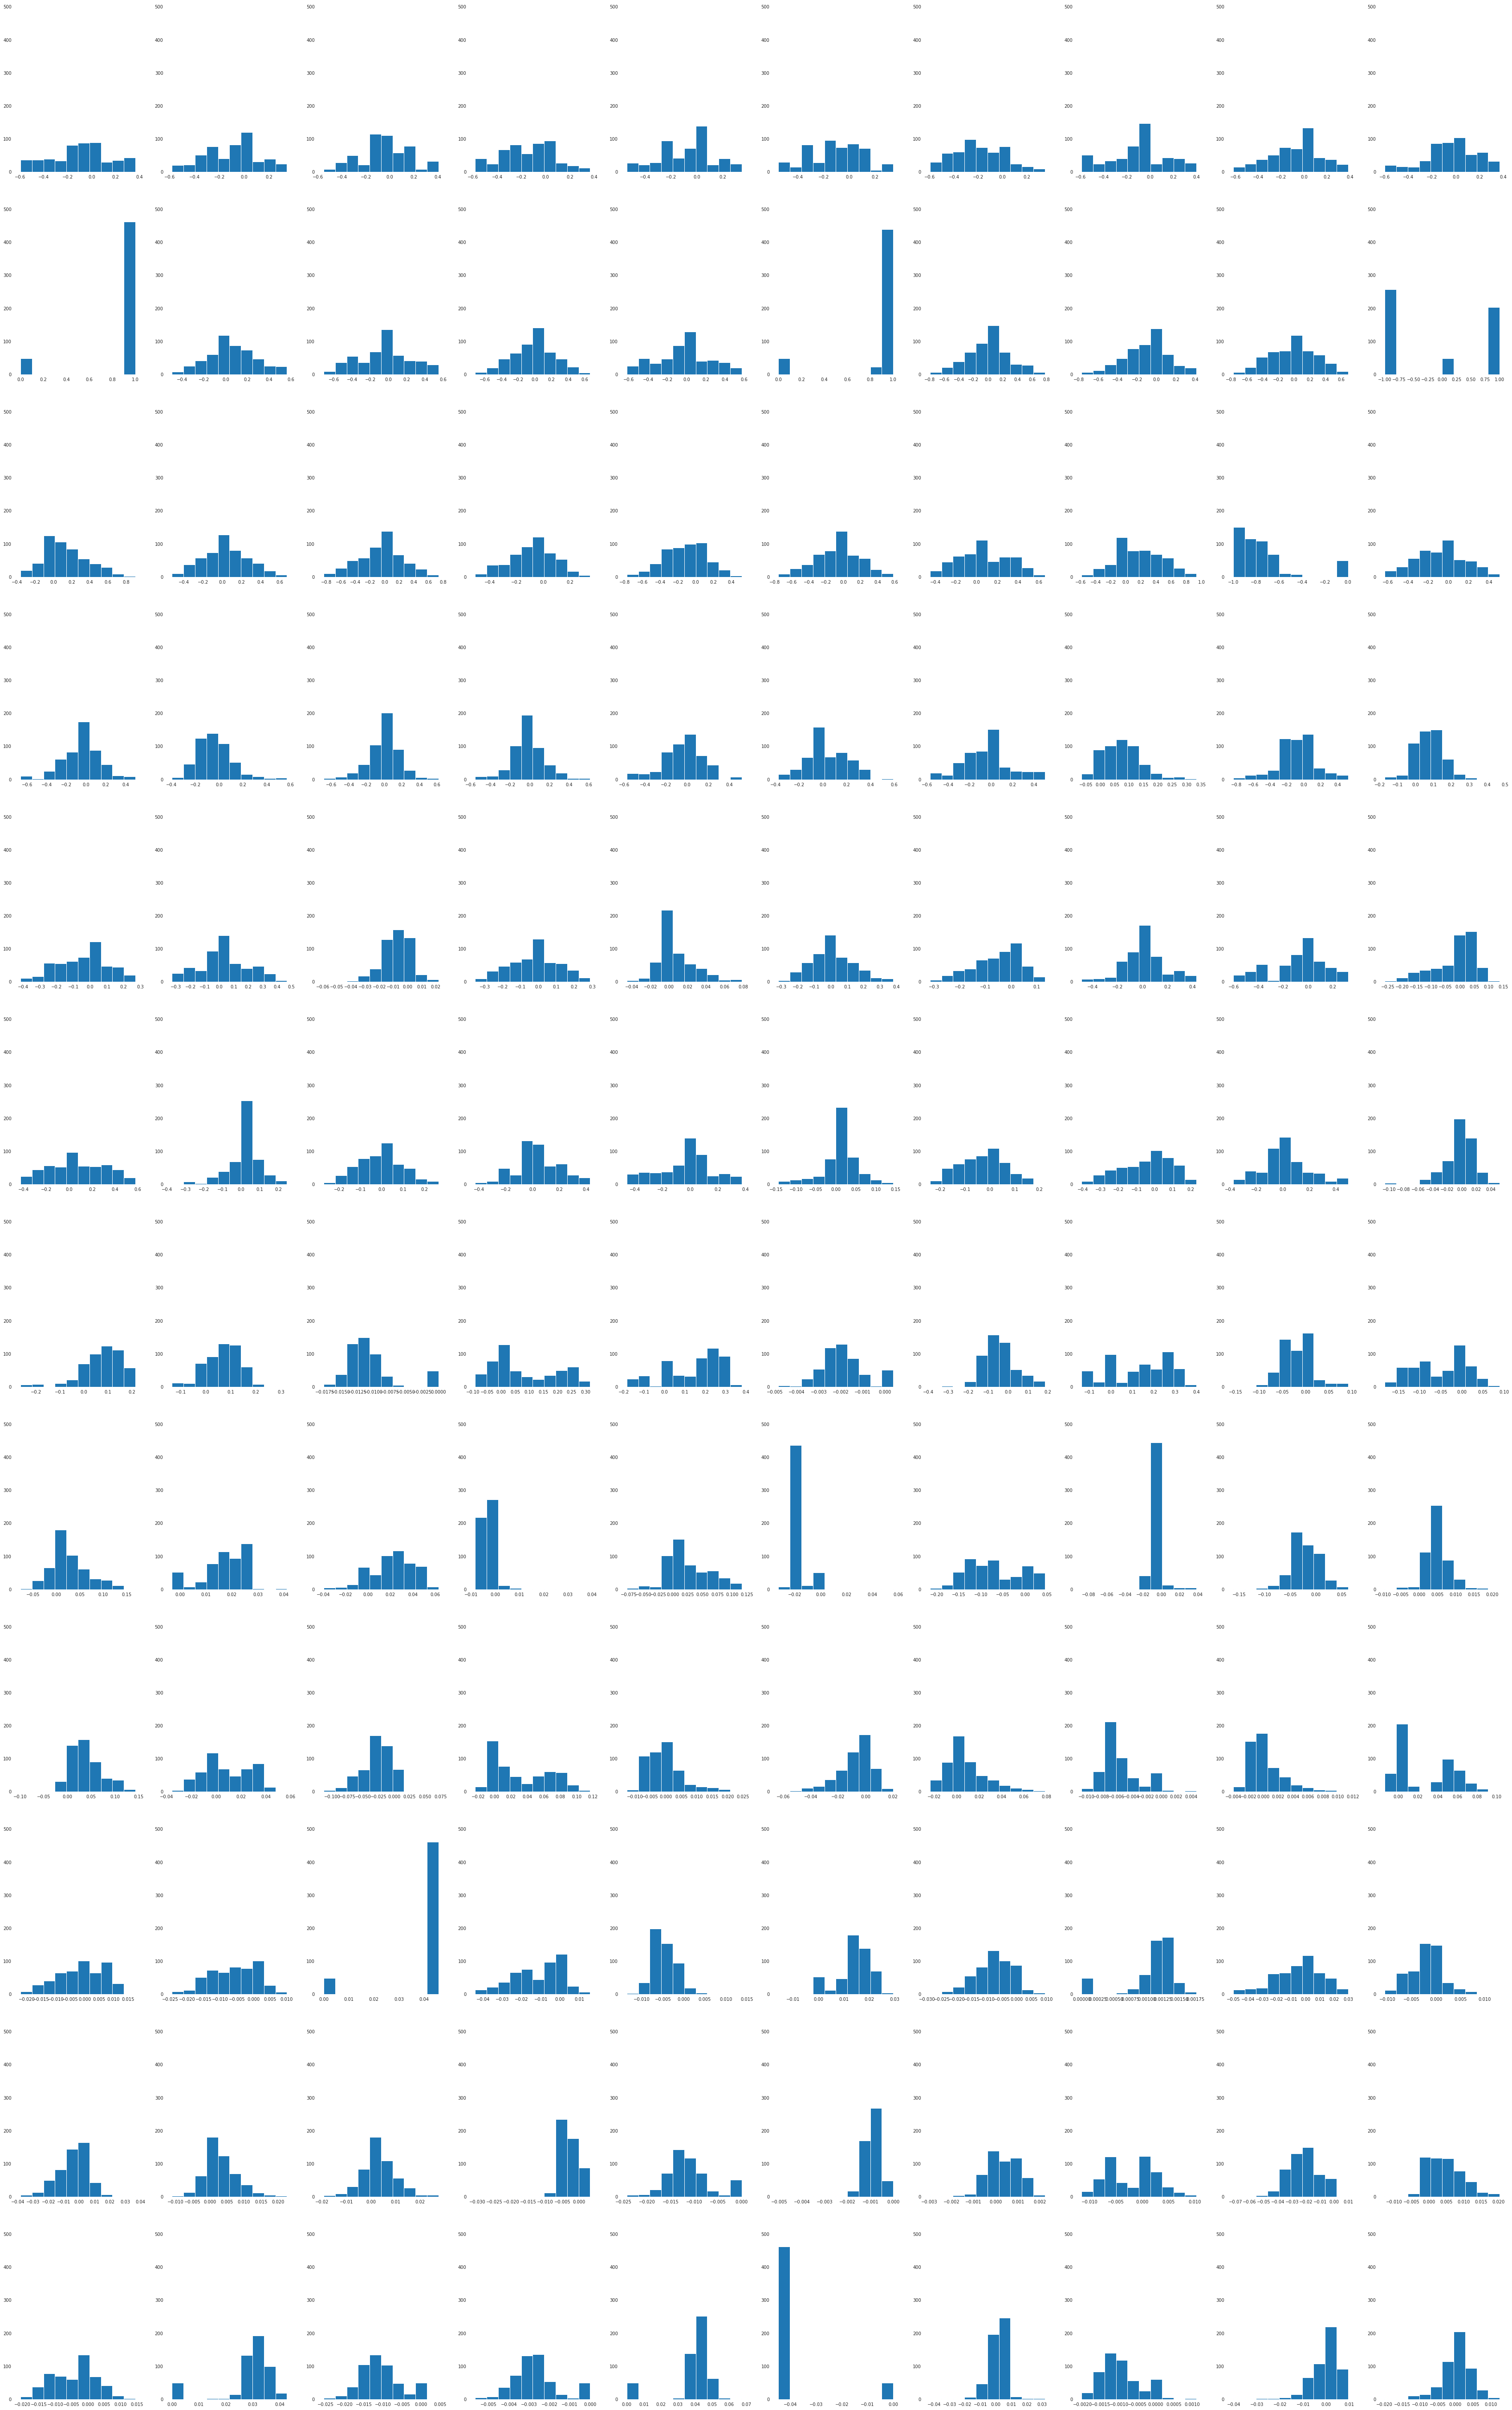

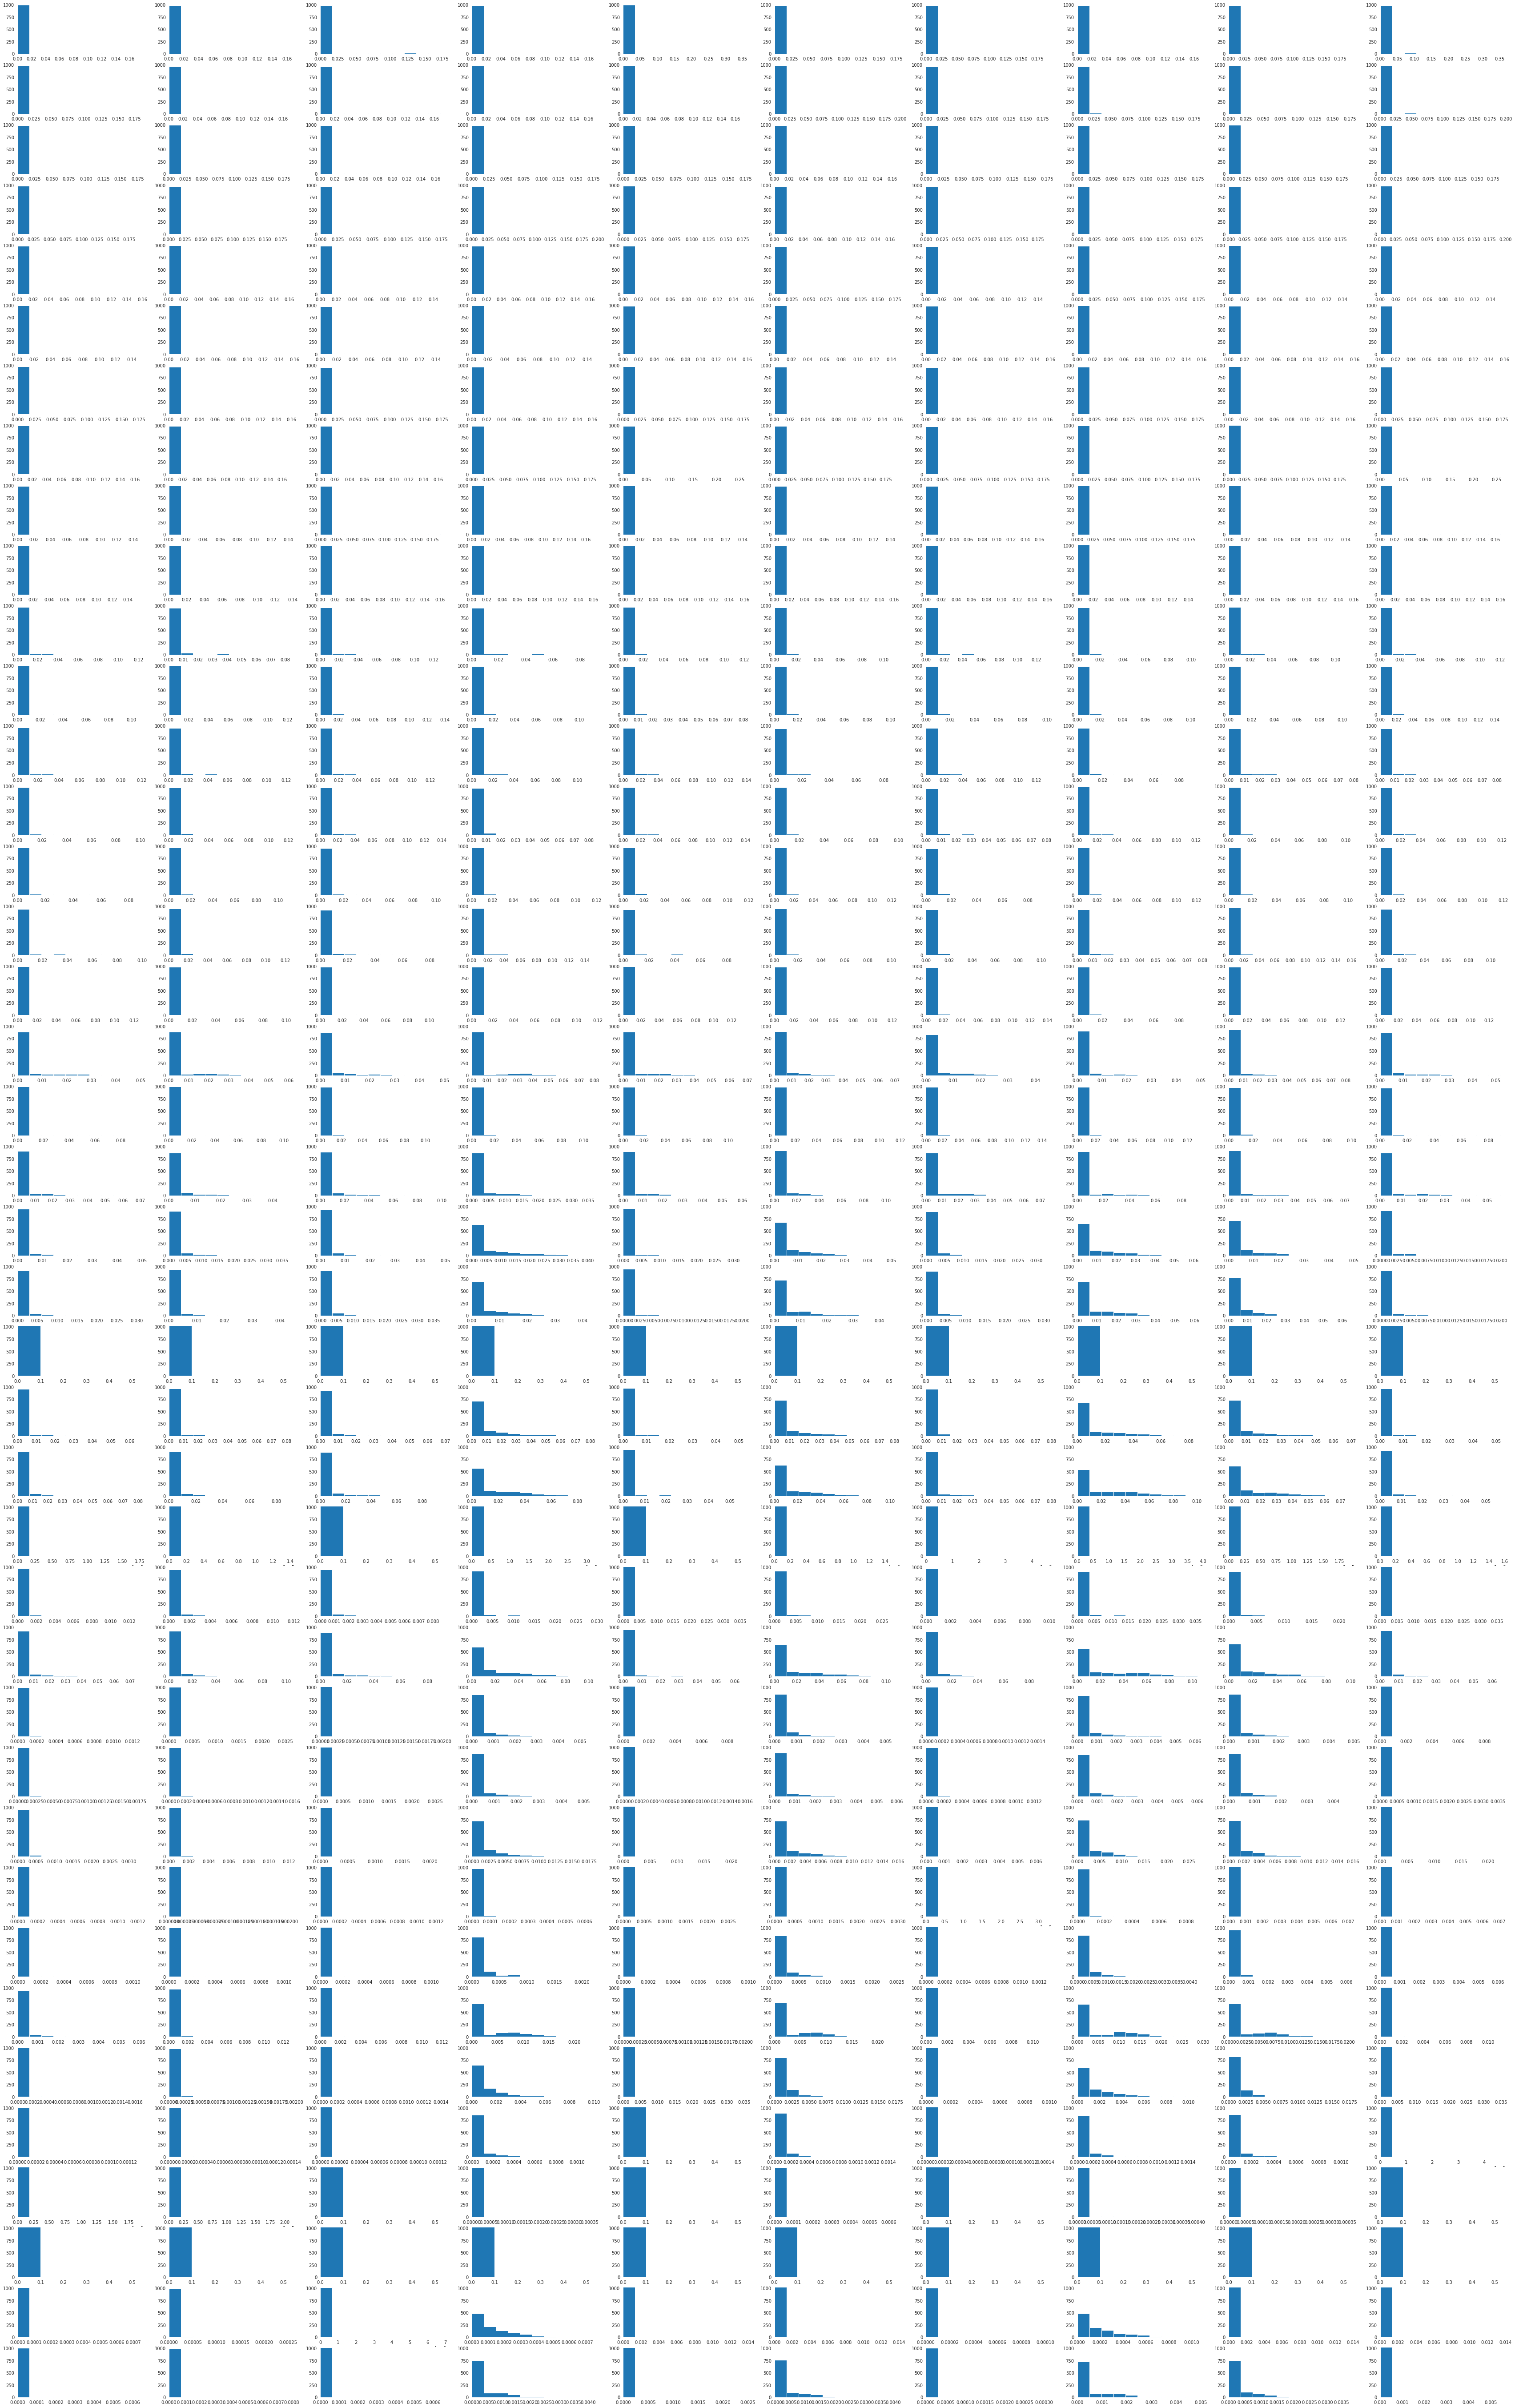

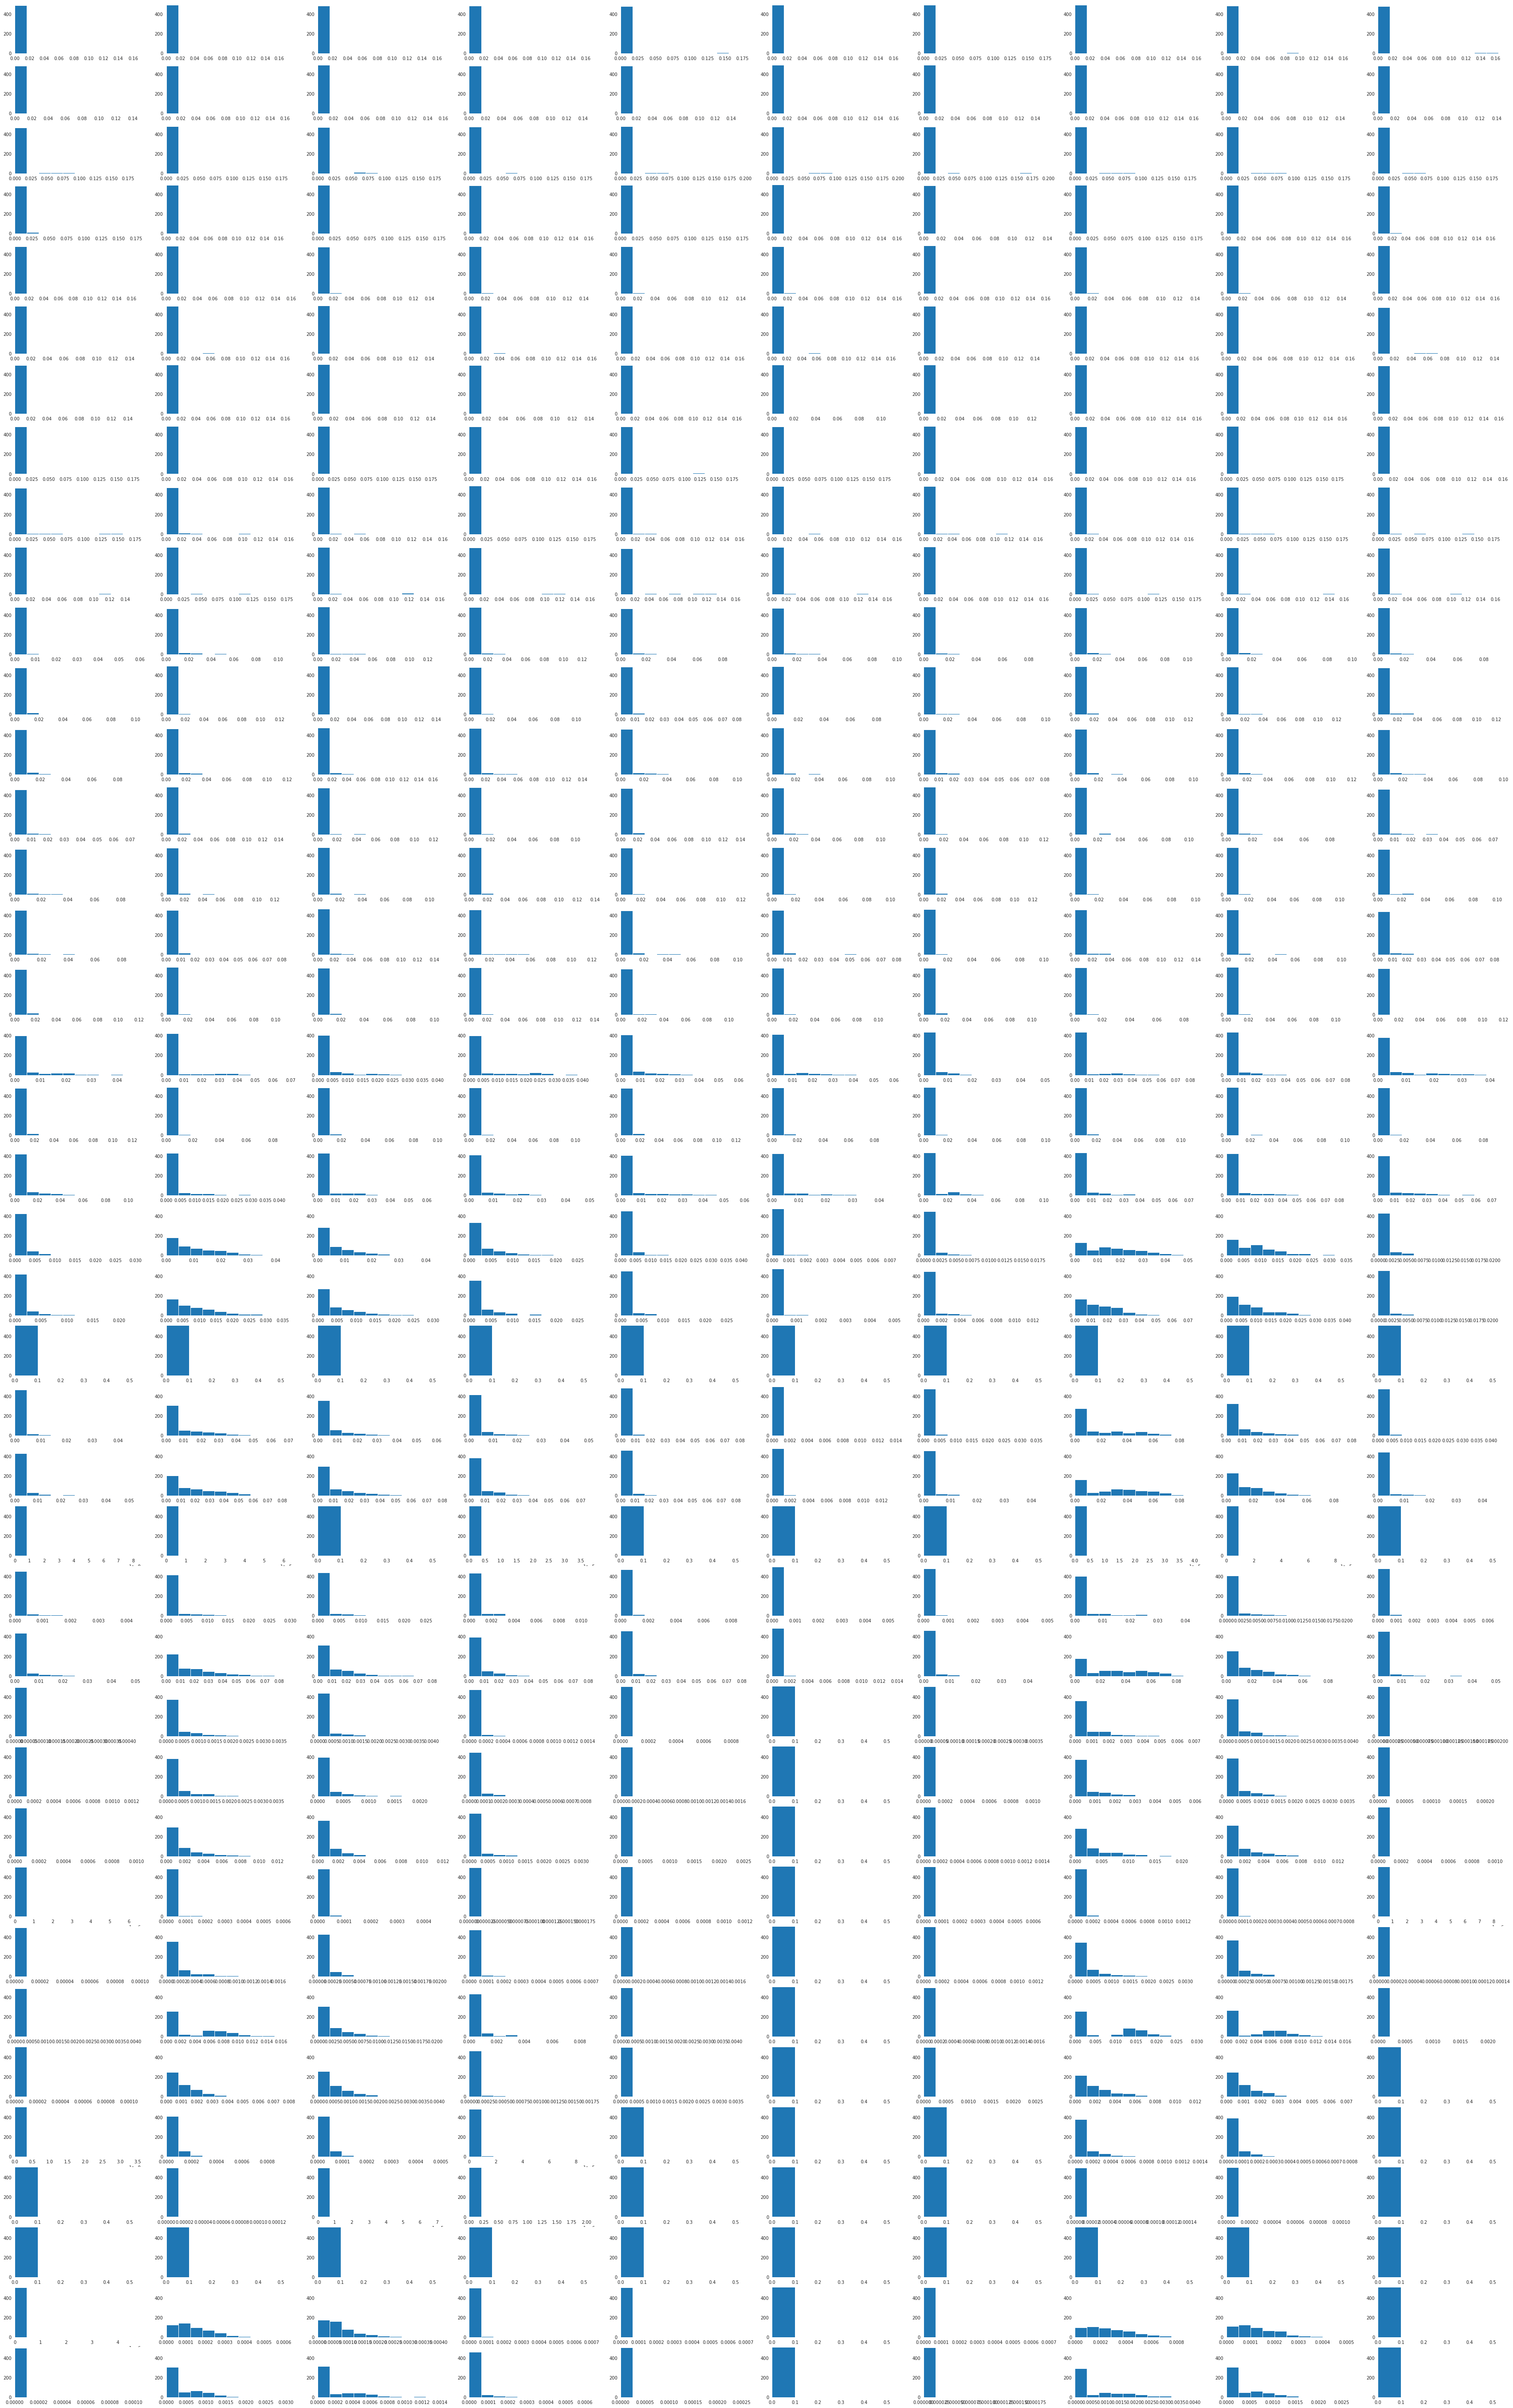

In [ ]:
# g0,g1

f = plt.figure(figsize=(60, 99))
for i in range(120) :

  ax = plt.subplot(12, 10, i + 1)
  s = g_all[env0][:,i]
  ax.hist(s)
  ax.set_ylim([0,2**(params['widths'][env0]+1)-1])
  
plt.show()
f.savefig("g0_hist_large_world_n_action=5.pdf")
plt.close("all")

f = plt.figure(figsize=(60, 99))
for i in range(120) :

  ax = plt.subplot(12, 10, i + 1)
  s = g_all[env1][:,i]
  ax.hist(s)
  #ax.set_xlim(left=-1)
  ax.set_ylim([0,2**(params['widths'][env1]+1)-1])
  
plt.show()
f.savefig("g1_hist_large_world_n_action=5.pdf")
plt.close("all")


# p0,p1

f = plt.figure(figsize=(60, 99))
for i in range(400) :

  ax = plt.subplot(40, 10, i + 1)
  s = p_all[env0][:,i]
  ax.hist(s)
  ax.set_xlim(left=0)
  ax.set_ylim([0,2**(params['widths'][env0]+1)-1])
  
plt.show()
f.savefig("p0_hist_large_world_n_action=5.pdf")
plt.close("all")

f = plt.figure(figsize=(60, 99))
for i in range(400) :

  ax = plt.subplot(40, 10, i + 1)
  s = p_all[env1][:,i]
  ax.hist(s)
  ax.set_xlim(left=0)
  ax.set_ylim([0,2**(params['widths'][env1]+1)-1])
  
plt.show()
f.savefig("p1_hist_large_world_n_action=5.pdf")
plt.close("all")

In [ ]:
# Generate random grid cells

In [ ]:

fake_env_size=9
random.seed(129)
test=np.array([[random.uniform(-1,1) for j in range(120)]])
test
for i in range(2**(fake_env_size+1)-2) :
  random.seed(i)
  test=np.concatenate((test,np.array([[random.uniform(-1,1) for j in range(120)]])))
f = plt.figure(figsize=(60, 80))

for i in range(120):
  ax = plt.subplot(12, 10, i + 1)
  G=nx.Graph()
  for j in range(2**(fake_env_size)-1):  
    G.add_edges_from([(j,2*j+1),(j,2*j+2)])
  pos = hierarchy_pos(G,0)    
  nx.draw(G, pos=pos, with_labels=False,node_color=test[:,i],cmap=plt.cm.jet,vmin=test[:,i].min(), vmax=test[:,i].max(),edge_color="white" )
plt.show()
f.savefig("g_cell_random_env_size=" + str(fake_env_size)+".pdf")
plt.close("all")

In [ ]:
# fake_env_size=9
random.seed(129)
test=np.array([np.random.gamma(shape, scale, 400)])
test
for i in range(2**(fake_env_size+1)-2) :
  random.seed(i)
  test=np.concatenate((test,np.array([np.random.gamma(shape, scale, 400)])))
f = plt.figure(figsize=(60, 99))

for i in range(400):
  ax = plt.subplot(40, 10, i + 1)
  G=nx.Graph()
  for j in range(2**(fake_env_size)-1):  
    G.add_edges_from([(j,2*j+1),(j,2*j+2)])
  pos = hierarchy_pos(G,0)    
  nx.draw(G, pos=pos, with_labels=False,node_color=test[:,i],cmap=plt.cm.jet,vmin=test[:,i].min(), vmax=test[:,i].max(),edge_color="white" )
plt.show()
f.savefig("p_cell_random_env_size=" + str(fake_env_size)+".pdf")
plt.close("all")

In [ ]:
# g0

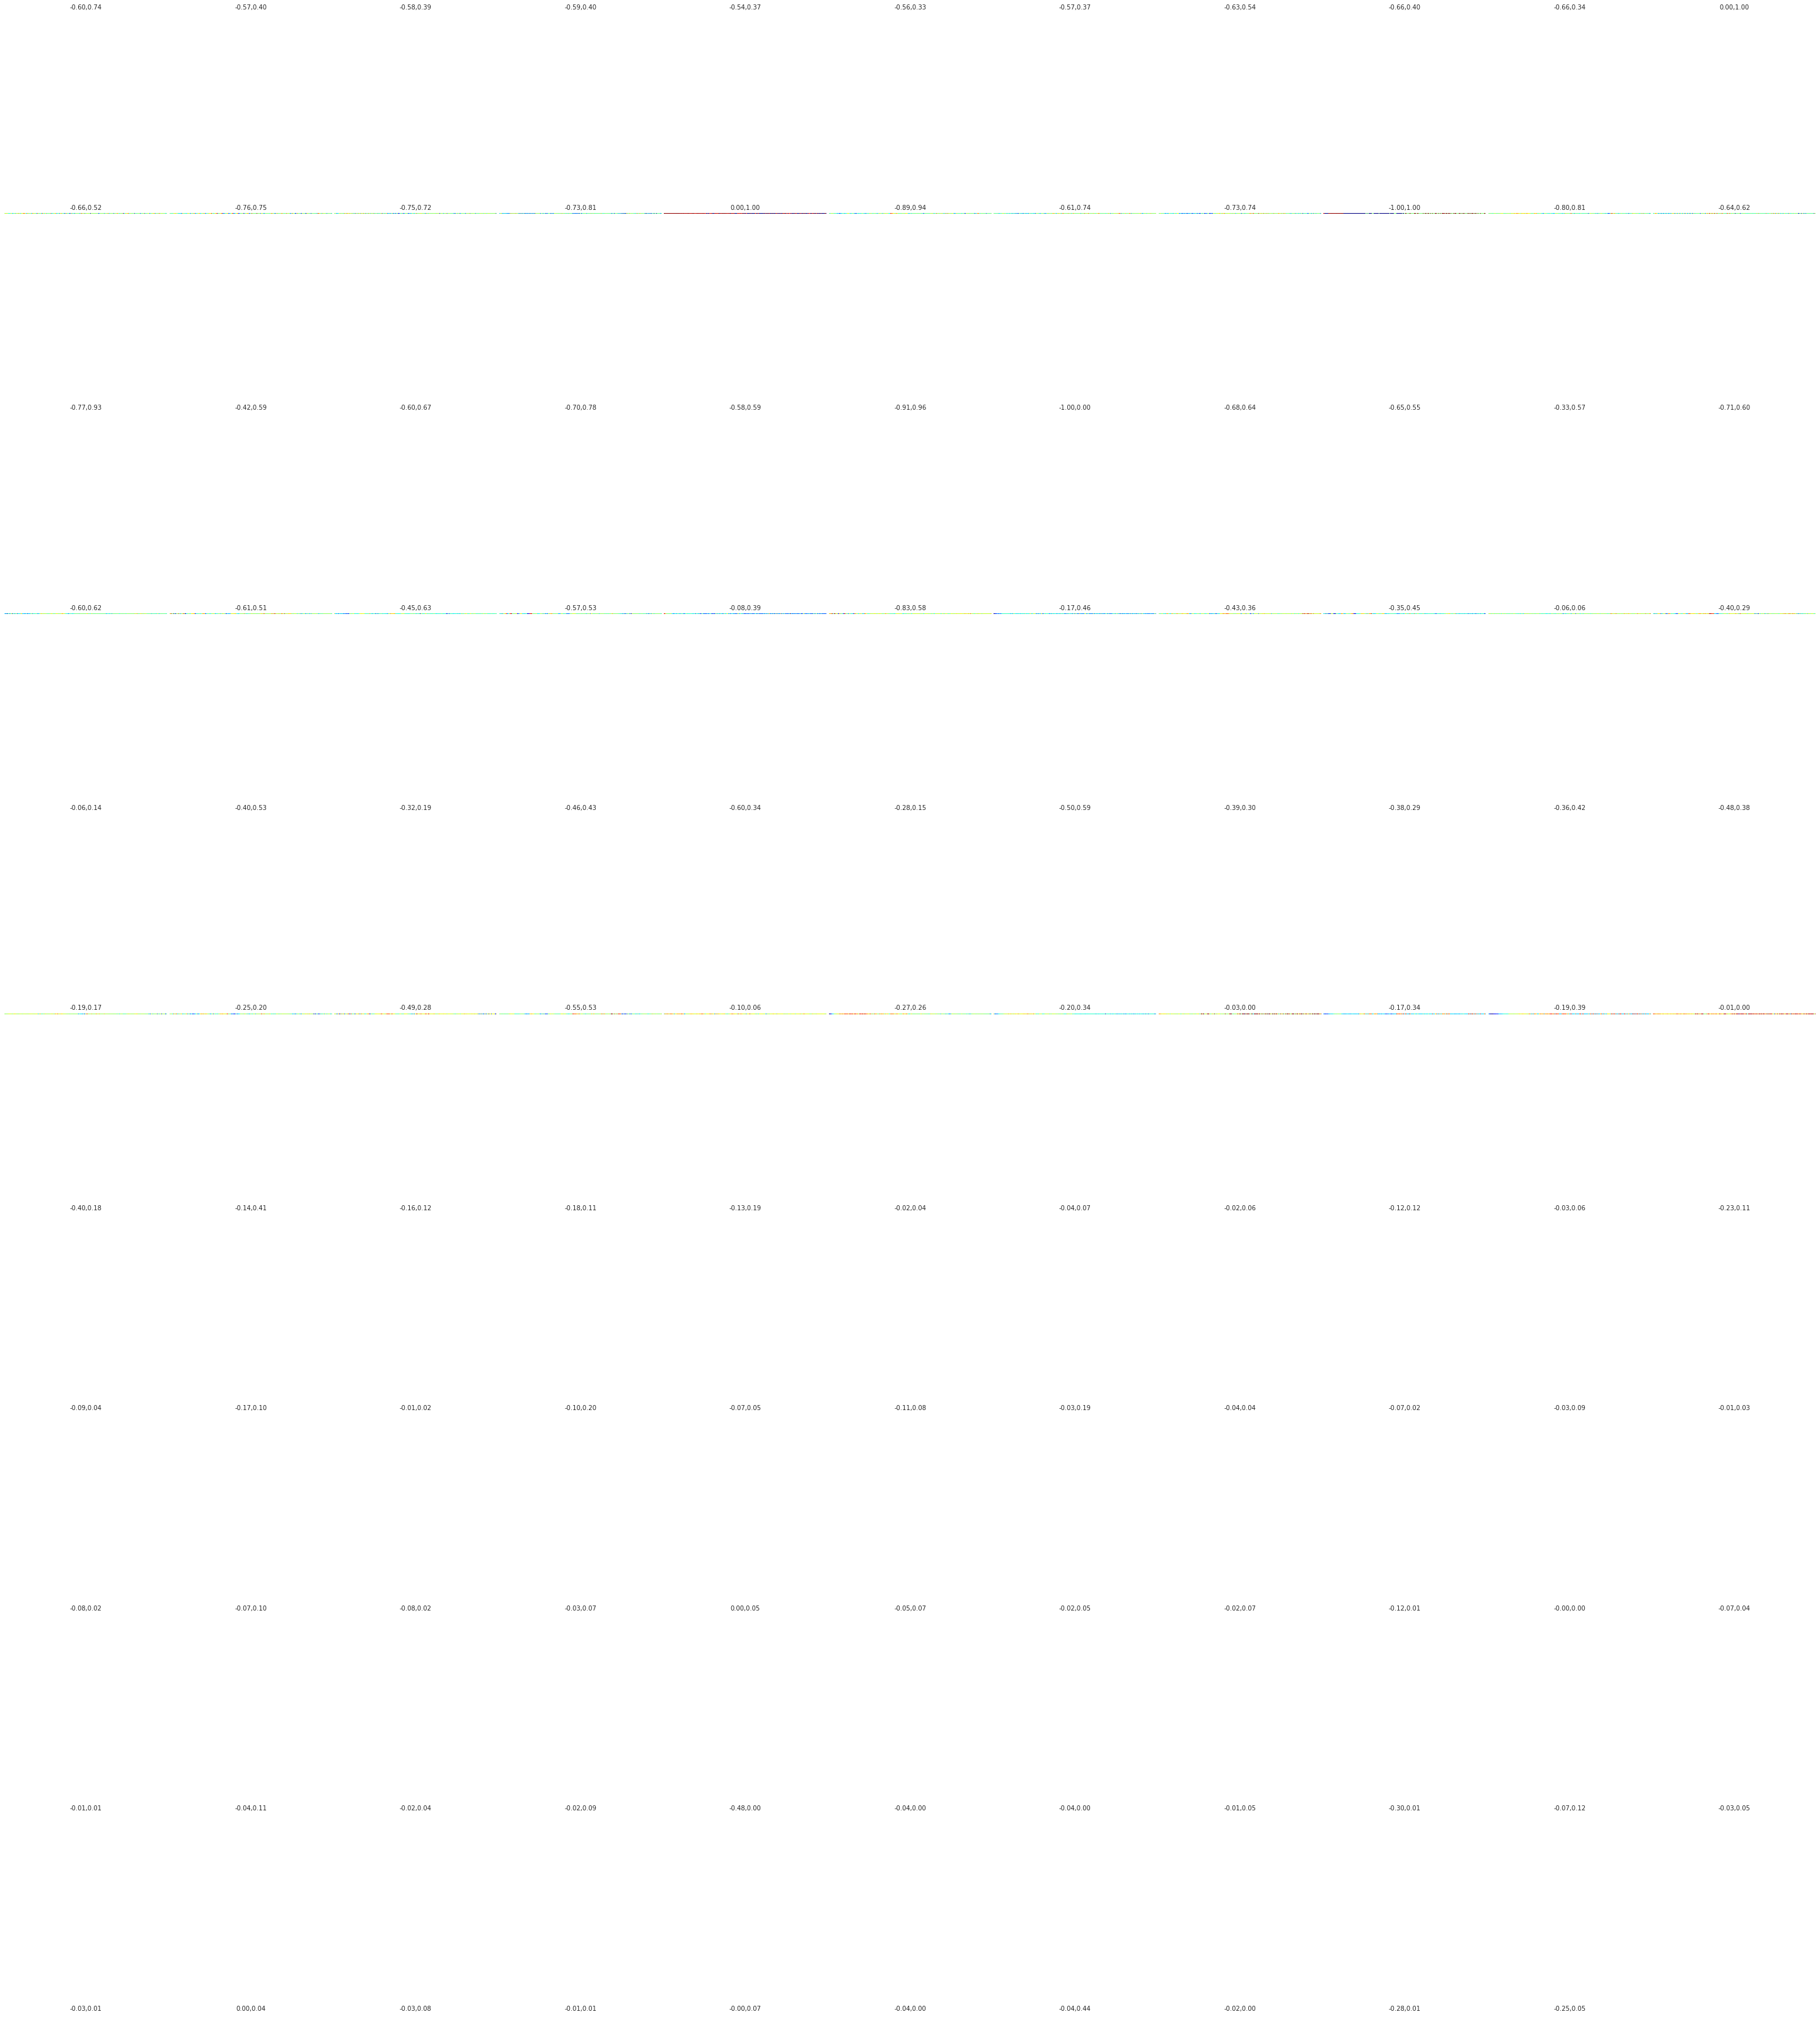

In [ ]:
square_plot(g_all[env0][:,], widths[batch_id[env0]], name='g0_no_smoothing_no_mult', maxmin=maxmin, shiny=shinys_[env0], \
            hexy=params['world_type'], lims=g_lim, mult=1, smoothing=0, cmap=cmap, mask=masks[env0])

In [ ]:
f = plt.figure(figsize=(60, 80))

for i in range(10):
  ax = plt.subplot(12, 10, i + 1)
  G=nx.Graph()
  for j in range(2**(params['widths'][env0])-1):  
    G.add_edges_from([(j,2*j+1),(j,2*j+2)])
  pos = hierarchy_pos(G,0)    
  nx.draw(G, pos=pos, with_labels=False,node_color=g_all[env0][:,i],cmap=plt.cm.jet,vmin=g_lim[0][i], vmax=g_lim[1][i],edge_color="white" )
plt.show()

In [ ]:
f = plt.figure(figsize=(60, 80))

for i in range(120):
  ax = plt.subplot(12, 10, i + 1)
  G=nx.Graph()
  for j in range(2**(params['widths'][env0])-1):  
    G.add_edges_from([(j,2*j+1),(j,2*j+2)])
  pos = hierarchy_pos(G,0)    
  nx.draw(G, pos=pos, with_labels=False,node_color=g_all[env0][:,i],cmap=plt.cm.jet,vmin=g_lim[0][i], vmax=g_lim[1][i],edge_color="white" )
plt.show()
f.savefig("g0_pedigree_like.pdf")
plt.close("all")



In [ ]:
# g1 

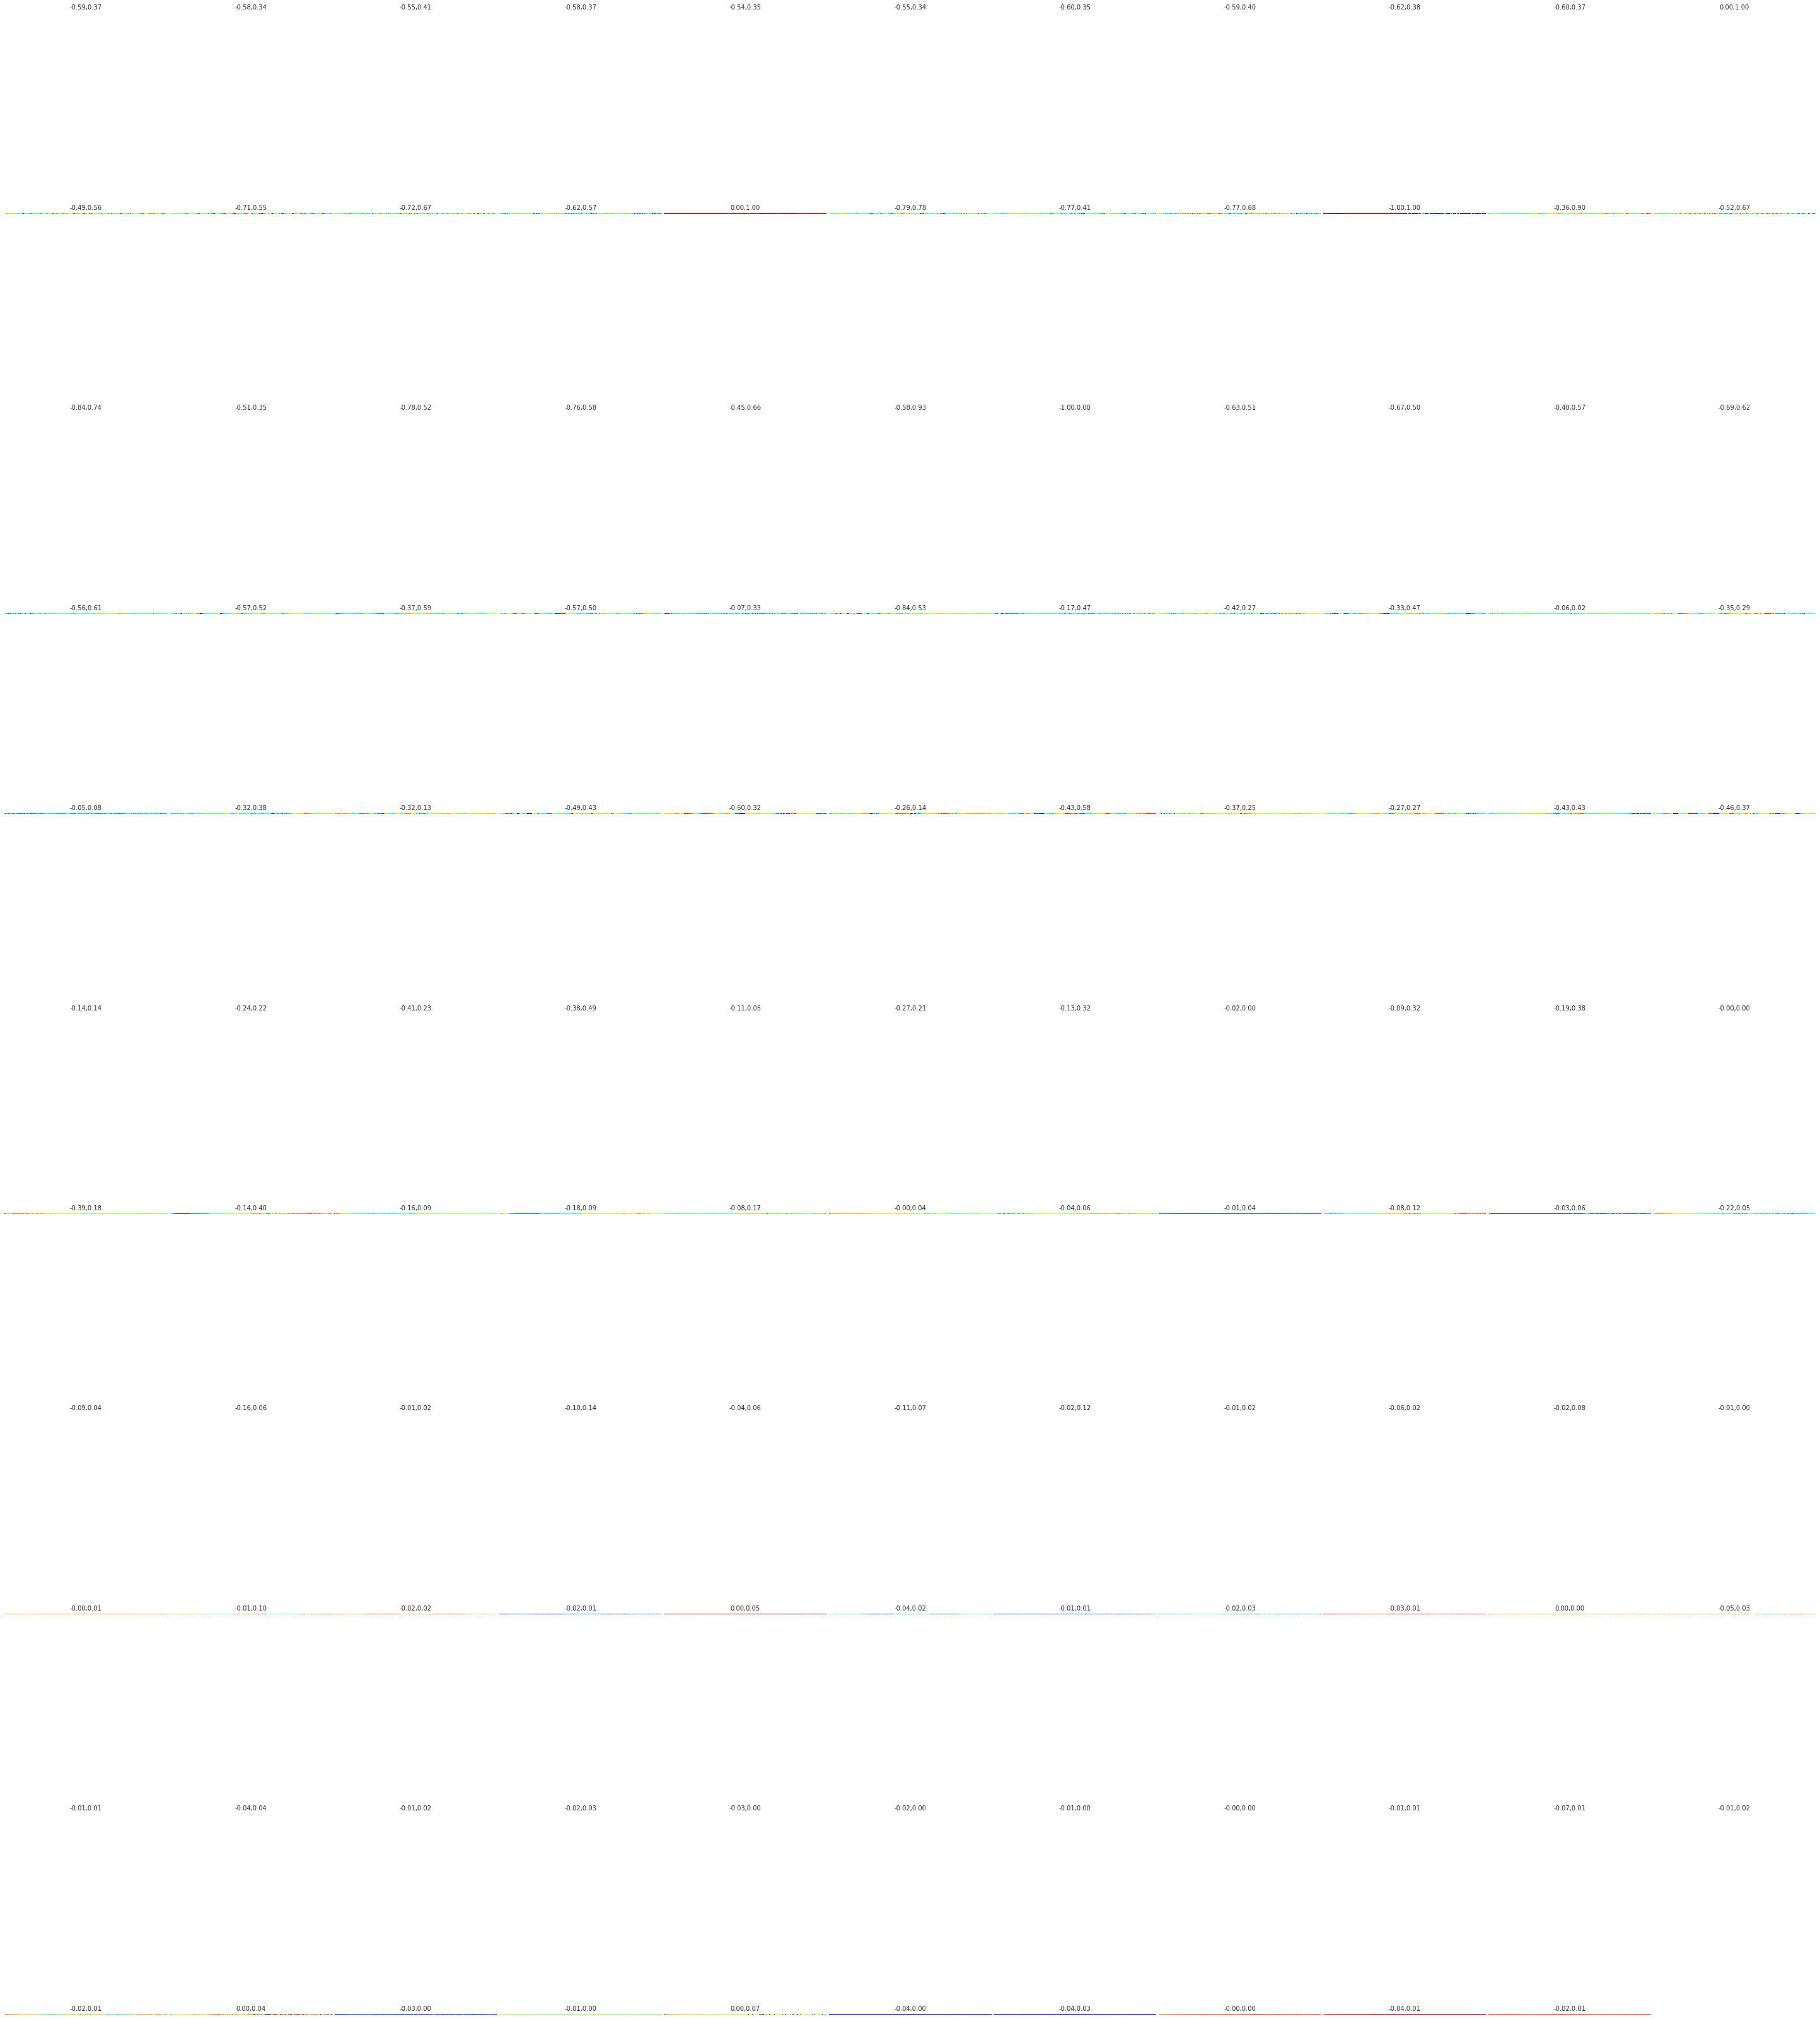

In [ ]:
square_plot(g_all[env1][:,], widths[batch_id[env1]], name='g1_no_smoothing_no_mult', maxmin=maxmin, shiny=shinys_[env1], \
            hexy=params['world_type'], lims=g_lim, mult=1, smoothing=0, cmap=cmap, mask=masks[env1])

In [ ]:
f = plt.figure(figsize=(60, 80))
for i in range(120):
  ax = plt.subplot(12, 10, i + 1)
  G=nx.Graph()
  for j in range(2**(params['widths'][env1])-1):  
    G.add_edges_from([(j,2*j+1),(j,2*j+2)])
  
  pos = hierarchy_pos(G,0)    
  nx.draw(G, pos=pos, with_labels=False,node_color=g_all[env1][:,i],cmap=plt.cm.jet,vmin=g_lim[0][i], vmax=g_lim[1][i],edge_color="white" )
plt.show()
f.savefig("g1_pedigree_like.pdf")
plt.close("all")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# p0

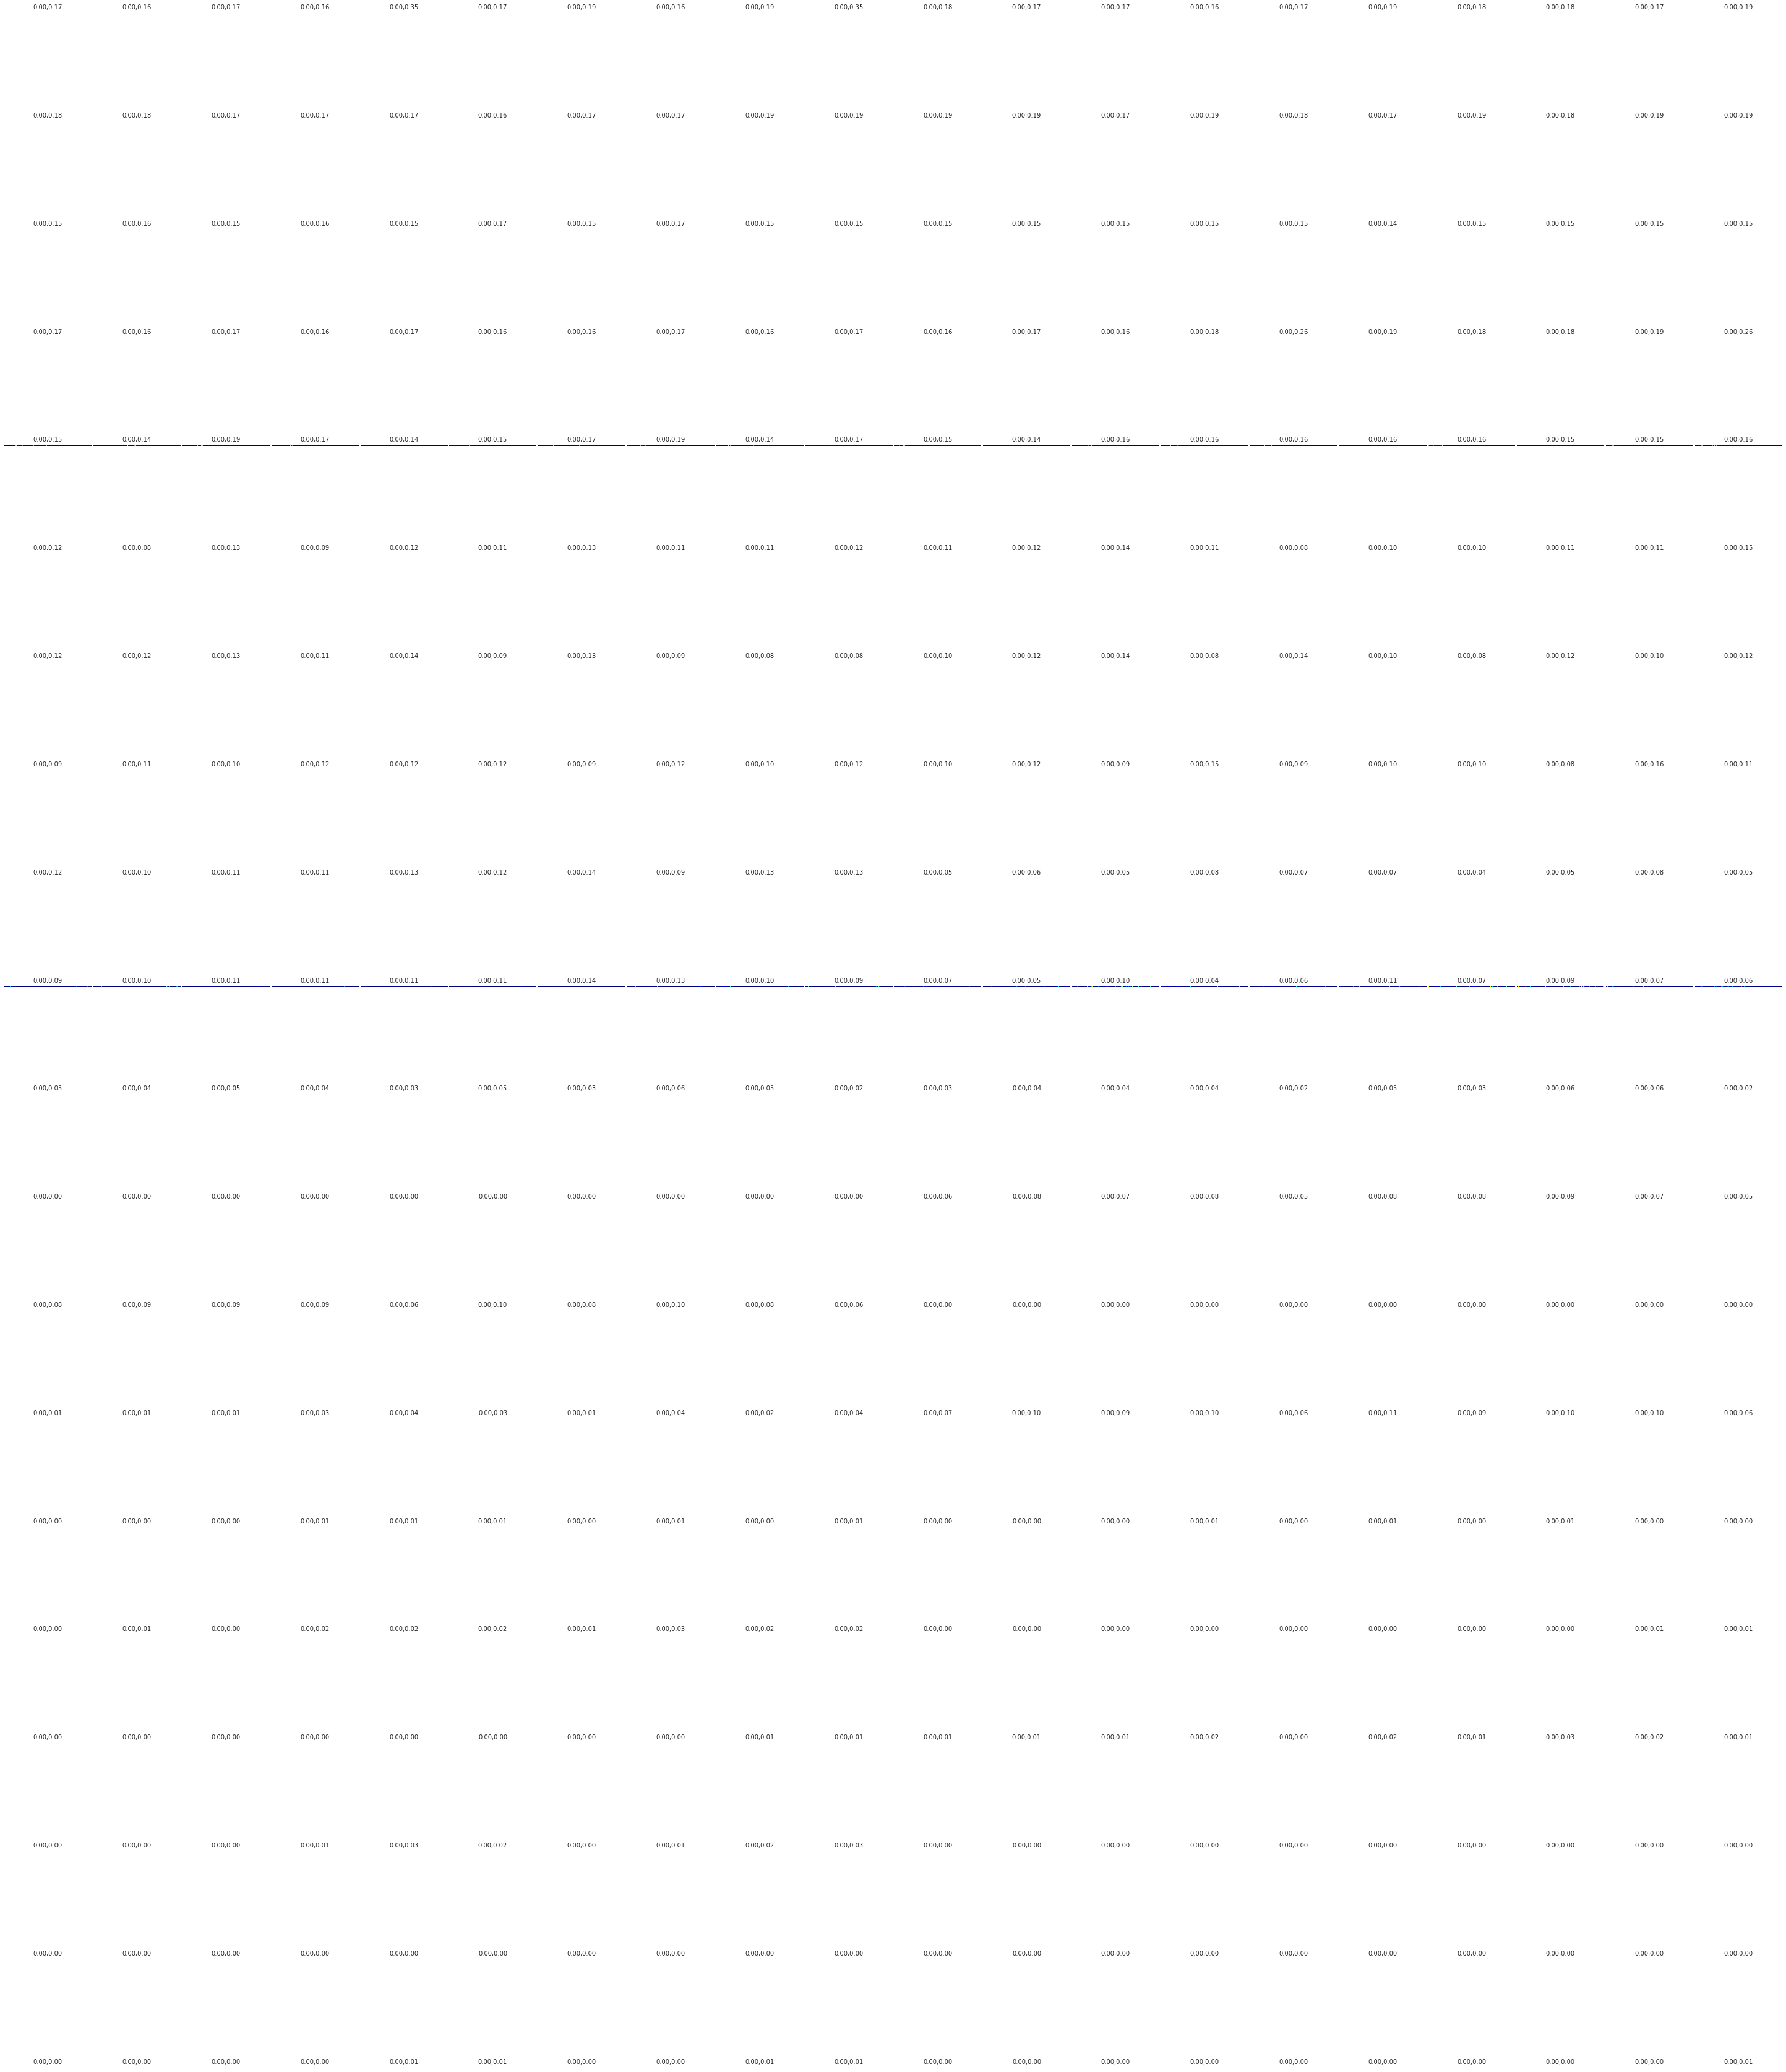

In [ ]:
square_plot(p_all[env0][:,], widths[batch_id[env0]], name='p0_no_smoothing_no_mult', maxmin=maxmin, shiny=shinys_[env0], \
            hexy=params['world_type'], lims=p_lim, mult=1, smoothing=0, cmap=cmap, mask=masks[env0])

In [ ]:


f = plt.figure(figsize=(40, 50))
f = plt.figure(figsize=(60, 99))
for i in range(400):
  ax = plt.subplot(40, 10, i + 1)
  G=nx.Graph()
  for j in range(2**(params['widths'][env0])-1):  
    G.add_edges_from([(j,2*j+1),(j,2*j+2)])
  pos = hierarchy_pos(G,0)    
  nx.draw(G, pos=pos, with_labels=False,node_color=p_all[env0][:,i],cmap=plt.cm.jet,vmin=p_lim[0][i], vmax=p_lim[1][i],edge_color="white" )
plt.show()
f.savefig("p0_pedigree_like.pdf")
plt.close("all")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# p1

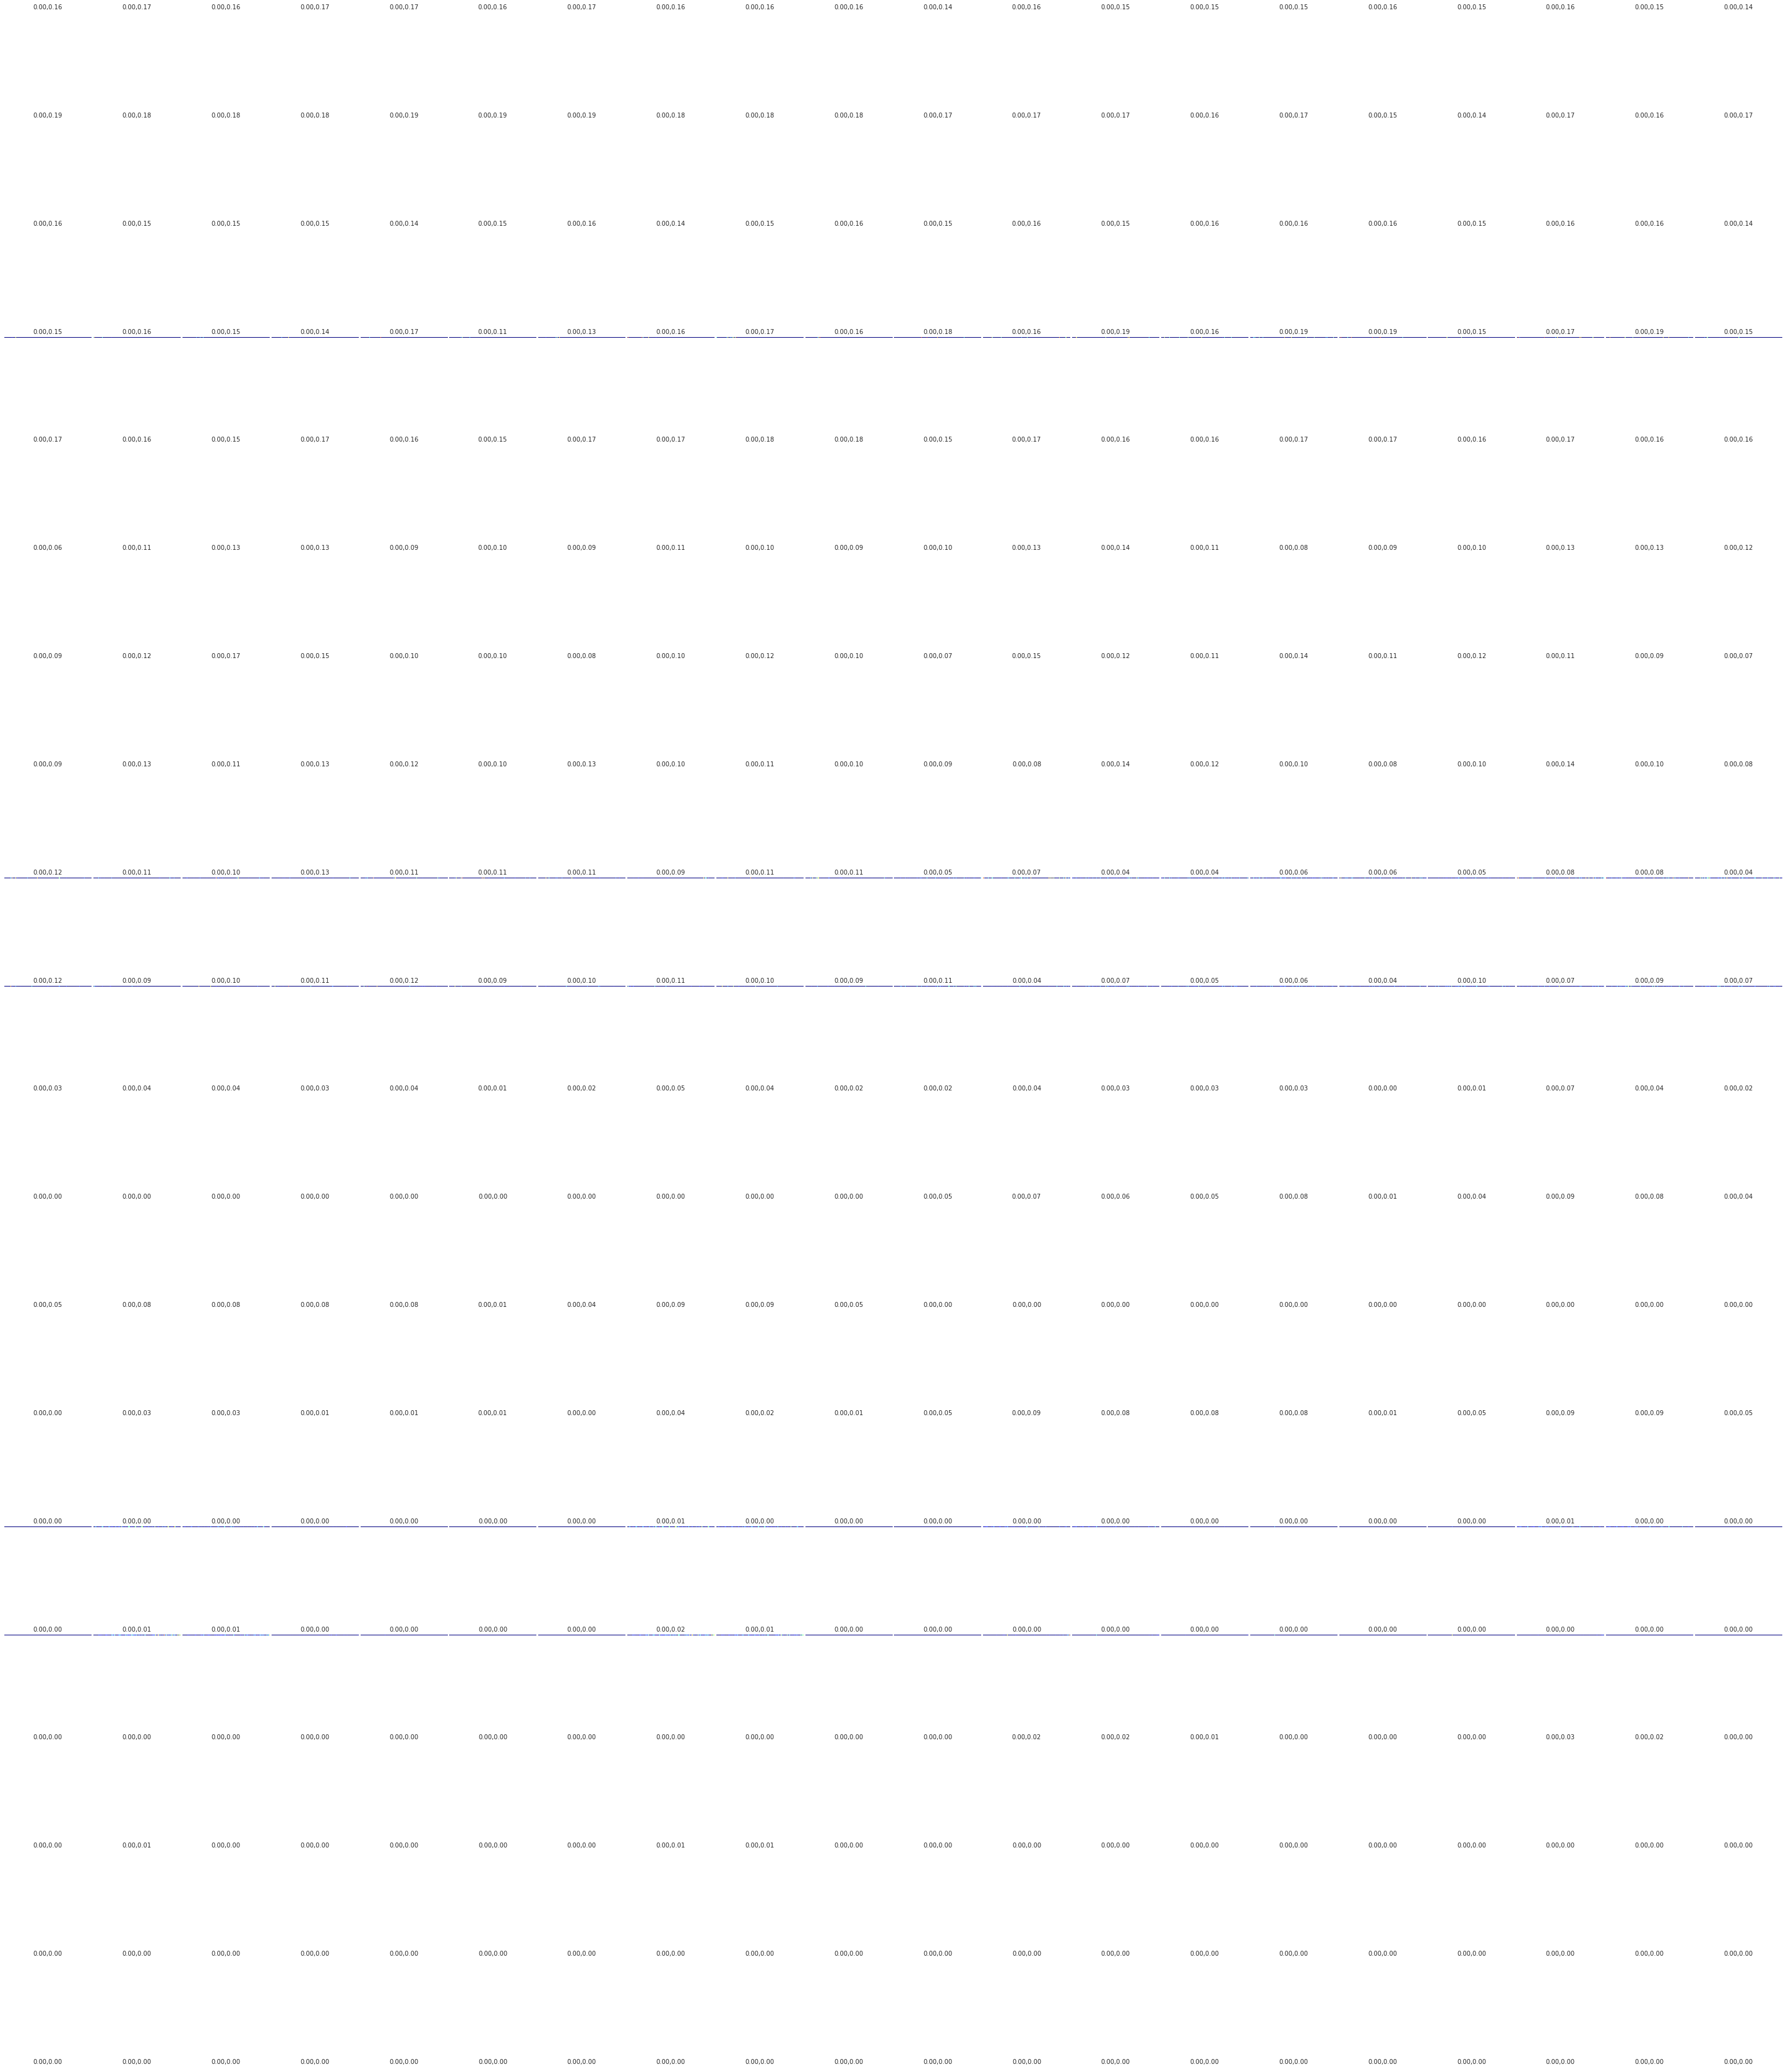

In [ ]:

square_plot(p_all[env1][:,], widths[batch_id[env1]], name='p1_no_smoothing_no_mult', maxmin=maxmin, shiny=shinys_[env1], \
            hexy=params['world_type'], lims=p_lim, mult=1, smoothing=0, cmap=cmap, mask=masks[env1])

In [ ]:


#f = plt.figure(figsize=(40, 50))
f = plt.figure(figsize=(60, 99))
for i in range(400):
  ax = plt.subplot(40, 10, i + 1)
  G=nx.Graph()
  for j in range(2**(params['widths'][env1])-1):  
    G.add_edges_from([(j,2*j+1),(j,2*j+2)])
  pos = hierarchy_pos(G,0)    
  nx.draw(G, pos=pos, with_labels=False,node_color=p_all[env1][:,i],cmap=plt.cm.jet,vmin=p_lim[0][i], vmax=p_lim[1][i],edge_color="white" )
plt.show()
f.savefig("p1_pedigree_like.pdf")
plt.close("all")

Output hidden; open in https://colab.research.google.com to view.

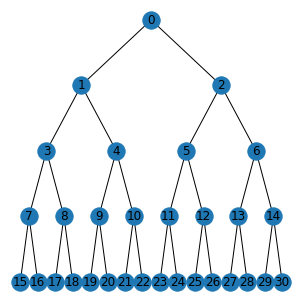

In [ ]:
G=nx.Graph()
#G.add_edges_from([(0,1), (0,2),(1,3), (1,4),(2,5),(2,6)])
plt.figure(3,figsize=(4,4))
for i in range(15):  
  G.add_edges_from([(i,2*i+1),(i,2*i+2)])
  #G.add_edges_from([(i,2*i+2)])
  

pos = hierarchy_pos(G,0)  
nx.draw(G, pos=pos, with_labels=True)#,edge_color="white")